In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from scipy.stats import probplot

sns.set_context('poster')

<H2>LOADING THE DATA</H2>

In [2]:
breast_cancer = pd.read_csv('MS4S16_Dataset.csv')

<h3> DATA PREPROCESSING AND EDA</h3>
<H5>Introduction</H5>
Pre-processing and EDA are pivotal for data readiness. They encompass tasks such as splitting data for training/testing, rectifying missing/duplicate/outlier values, and transforming features to align with modeling requirements. Encoding categorical variables and conducting feature engineering enhance model efficacy. EDA uncovers insights through visual exploration, while assessing statistical assumptions ensures the reliability of subsequent analyses. These steps collectively refine data quality, unveil patterns, and set the stage for robust modeling

In [3]:
breast_cancer.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302.0         M        17.99         10.38          122.80     1001.0   
1    842517.0         M        20.57         17.77          132.90     1326.0   
2  84300903.0         M        19.69         21.25          130.00     1203.0   
3  84348301.0         M        11.42         20.38           77.58      386.1   
4  84358402.0         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
breast_cancer.tail(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
566  926682.0         M        20.13         28.25          131.20     1261.0   
567  926954.0         M        16.60         28.08          108.30      858.1   
568  927241.0         M        20.60         29.33          140.10     1265.0   
569   92751.0         B         7.76         24.54           47.92      181.0   
570   92751.0         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
566          0.09780           0.10340         0.14400              0.09791   
567          0.08455           0.10230         0.09251              0.05302   
568          0.11780           0.27700         0.35140              0.15200   
569          0.05263           0.04362         0.00000              0.00000   
570          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
566  ...        23.690          38.25           155.00      1731.0   
567  ...        18.980          34.12           126.70      1124.0   
568  ...        25.740          39.42           184.60      1821.0   
569  ...         9.456          30.37            59.16       268.6   
570  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
566           0.11660            0.19220           0.3215   
567           0.11390            0.30940           0.3403   
568           0.16500            0.86810           0.9387   
569           0.08996            0.06444           0.0000   
570           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
566                0.1628          0.2572                  0.06637  
567                0.1418          0.2218                  0.07820  
568                0.2650          0.4087                  0.12400  
569                0.0000          0.2871                  0.07039  
570                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [5]:
breast_cancer.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.680000e+02   566.000000    565.000000      567.000000   566.000000   
mean   3.011402e+07    14.103267   -241.973664       91.949048   654.942403   
std    1.250894e+08     3.517424    445.216862       24.358029   352.555899   
min    8.670000e+03     6.981000   -999.000000       43.790000   143.500000   
25%    8.690778e+05    11.692500   -999.000000       75.190000   420.300000   
50%    9.060010e+05    13.320000     17.000000       86.240000   548.750000   
75%    8.812852e+06    15.780000     21.010000      104.200000   787.050000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       568.000000        567.000000      567.000000           563.000000   
mean          0.096312          0.104333        0.088712            -3.500369   
std           0.014178          0.052878        0.079739            59.492306   
min           0.052630          0.019380        0.000000          -999.000000   
25%           0.086290          0.064710        0.029520             0.019885   
50%           0.095895          0.092630        0.061540             0.033340   
75%           0.105325          0.130400        0.130000             0.073520   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     568.000000  ...    558.000000     550.000000       565.000000   
mean        0.187402  ...     16.269794      25.735691       110.948035   
std         0.115008  ...      4.842370       6.123776        59.245691   
min         0.000700  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.015000      21.222500        84.160000   
50%         0.179200  ...     14.965000      25.455000        97.820000   
75%         0.195700  ...     18.782500      29.705000       126.900000   
max         2.100000  ...     36.040000      49.540000       910.000000   

         area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count    567.000000        562.000000         567.000000       568.000000   
mean     897.936508          0.132469           0.254412         0.272125   
std      688.231051          0.022865           0.157582         0.208867   
min      185.200000          0.071170           0.027290         0.000000   
25%      515.550000          0.116850           0.147450         0.114475   
50%      686.600000          0.131350           0.214100         0.227450   
75%     1091.500000          0.146000           0.339500         0.383500   
max    10056.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            565.000000      567.000000               558.000000  
mean               0.114470        0.290327                 0.084020  
std                0.065854        0.061907                 0.018171  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250450                 0.071318  
50%                0.099930        0.282600                 0.079960  
75%                0.161300        0.318550                 0.092088  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [6]:
breast_cancer['diagnosis'].value_counts()

diagnosis
B    356
M    212
Name: count, dtype: int64

In [7]:
# grouping all null values together to ascertain the true number of null values
replace_values = ['NaN', 'NA', 'None', -999, 0, '-', '']


breast_cancer.replace(replace_values, np.nan, inplace=True)

<b>The data was loaded and we briefly looked at the structure of the data. We also did a bit of summary statistics just to get a quick over view of the data in general.
All missing values were grouped together, as it was also observed that there are different types of missing values in the data</b>

In [8]:
breast_cancer.isnull().sum()

id                           3
diagnosis                    3
radius_mean                  5
texture_mean               151
perimeter_mean               4
area_mean                    5
smoothness_mean              3
compactness_mean             4
concavity_mean              18
concave points_mean         24
symmetry_mean                3
fractal_dimension_mean      12
radius_se                    6
texture_se                   8
perimeter_se                 3
area_se                      6
smoothness_se                6
compactness_se               7
concavity_se                22
concave points_se           23
symmetry_se                  8
fractal_dimension_se         7
radius_worst                13
texture_worst               21
perimeter_worst              6
area_worst                   4
smoothness_worst             9
compactness_worst            4
concavity_worst             17
concave points_worst        20
symmetry_worst               4
fractal_dimension_worst     13
dtype: i

<H5> HANDLING MISSING VALUES AND DUPLICATE VALUES</H5>

In [9]:
breast_cancer.dropna(subset=['id'], inplace=True)

In [10]:
breast_cancer.drop('texture_mean',axis=1, inplace=True)

In [11]:
breast_cancer.drop('id',axis=1, inplace=True)

In [12]:
breast_cancer.duplicated().sum()

2

In [13]:
breast_cancer.drop_duplicates(inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split( #split data
    breast_cancer.drop('diagnosis', axis=1),
    breast_cancer['diagnosis'],
    test_size=0.3,
    random_state=42
)

columns_to_fill = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Group by the target variable and apply imputation within each group
for category in y_train.unique():
    # Select rows for the current category
    category_indices_train = y_train[y_train == category].index
    category_indices_test = y_test[y_test == category].index
    
    # Fit on the training set and transform both training and test sets for the current category
    X_train.loc[category_indices_train, columns_to_fill] = imputer.fit_transform(X_train.loc[category_indices_train, columns_to_fill])
    X_test.loc[category_indices_test, columns_to_fill] = imputer.transform(X_test.loc[category_indices_test, columns_to_fill])

<b>Splitting the data at this stage is necessary because we will be performing series of transformations subsequently and will need consistency between the training and test sets and also to prevent data leakage and ensure that the test data remains unseen during the preprocessing steps.  
This simple imputer code performs imputation (filling missing values) in specific columns of the training and test datasets (X_train and X_test) based on the median value within each category of the target variable (y_train and y_test). using the median value obtained from the training set.</b>

The subsequent lines of code verifies that the imputer code has done what we wanted.

In [15]:
X_train.isnull().sum()

radius_mean                0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
X_train.describe()

radius_mean  perimeter_mean    area_mean  smoothness_mean  \
count   396.000000      396.000000   396.000000       396.000000   
mean     14.124184       92.041174   656.806313         0.096245   
std       3.508893       24.309240   358.533297         0.014342   
min       7.729000       47.980000   178.800000         0.062510   
25%      11.697500       75.127500   420.175000         0.085402   
50%      13.290000       85.935000   546.350000         0.094895   
75%      15.715000      103.325000   766.950000         0.105150   
max      28.110000      188.500000  2501.000000         0.163400   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        396.000000      396.000000           396.000000     396.000000   
mean           0.103857        0.088022             0.048740       0.184829   
std            0.051733        0.077712             0.037691       0.100778   
min            0.019380        0.000692             0.001852       0.000700   
25%            0.062805        0.030825             0.020865       0.161875   
50%            0.092350        0.059105             0.033770       0.178800   
75%            0.131075        0.129950             0.070387       0.195450   
max            0.286700        0.426800             0.201200       2.100000   

       fractal_dimension_mean   radius_se  ...  radius_worst  texture_worst  \
count              396.000000  396.000000  ...    396.000000     396.000000   
mean                 0.062728    0.405416  ...     16.283543      25.481957   
std                  0.007034    0.290624  ...      4.828584       6.120742   
min                  0.049960    0.111500  ...      9.077000      12.020000   
25%                  0.057655    0.232250  ...     13.067500      20.910000   
50%                  0.061820    0.321750  ...     14.940000      25.050000   
75%                  0.066028    0.482725  ...     18.295000      29.410000   
max                  0.097440    2.873000  ...     36.040000      49.540000   

       perimeter_worst    area_worst  smoothness_worst  compactness_worst  \
count       396.000000    396.000000        396.000000         396.000000   
mean        112.358788    902.990530          0.131886           0.250699   
std          67.117134    738.143812          0.023058           0.152696   
min          57.170000    248.000000          0.081250           0.034320   
25%          84.567500    516.325000          0.114625           0.147775   
50%          98.320000    687.100000          0.129800           0.209250   
75%         123.700000   1026.750000          0.146000           0.341700   
max         910.000000  10056.000000          0.218400           0.937900   

       concavity_worst  concave points_worst  symmetry_worst  \
count       396.000000            396.000000      396.000000   
mean          0.268464              0.114638        0.287784   
std           0.196111              0.062746        0.062492   
min           0.001845              0.008772        0.156500   
25%           0.121800              0.065713        0.247250   
50%           0.219350              0.098095        0.280500   
75%           0.385300              0.157850        0.317800   
max           0.938700              0.290300        0.663800   

       fractal_dimension_worst  
count               396.000000  
mean                  0.083747  
std                   0.017705  
min                   0.055040  
25%                   0.071733  
50%                   0.080075  
75%                   0.091360  
max                   0.173000  

[8 rows x 29 columns]

In [17]:
X_train.median()

radius_mean                 13.290000
perimeter_mean              85.935000
area_mean                  546.350000
smoothness_mean              0.094895
compactness_mean             0.092350
concavity_mean               0.059105
concave points_mean          0.033770
symmetry_mean                0.178800
fractal_dimension_mean       0.061820
radius_se                    0.321750
texture_se                   1.108000
perimeter_se                 2.278500
area_se                     24.265000
smoothness_se                0.006353
compactness_se               0.020335
concavity_se                 0.026065
concave points_se            0.011095
symmetry_se                  0.018585
fractal_dimension_se         0.003212
radius_worst                14.940000
texture_worst               25.050000
perimeter_worst             98.320000
area_worst                 687.100000
smoothness_worst             0.129800
compactness_worst            0.209250
concavity_worst              0.219350
concave poin

In [18]:
data = pd.concat([X_train, y_train], axis=1)

# List of columns for which you want to calculate the median
columns_to_check = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Calculate median values by class
data.groupby(y_train)[columns_to_check].median()

radius_mean  perimeter_mean  area_mean  compactness_mean  \
diagnosis                                                             
B               12.180          78.235      455.8          0.075145   
M               17.385         114.400      947.9          0.133900   

           concavity_mean  concave points_mean  fractal_dimension_mean  \
diagnosis                                                                
B                 0.03735              0.02396                0.061885   
M                 0.14900              0.08520                0.061400   

           radius_se  texture_se  area_se  ...  radius_worst  texture_worst  \
diagnosis                                  ...                                
B             0.2561       1.093    19.41  ...         13.36         22.775   
M             0.5472       1.153    58.38  ...         20.47         28.220   

           perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
diagnosis                                                                     
B                     87.3      548.45           0.12375             0.1698   
M                    136.1     1295.00           0.14325             0.3583   

           concavity_worst  concave points_worst  symmetry_worst  \
diagnosis                                                          
B                   0.1423               0.07625          0.2645   
M                   0.4098               0.17720          0.3103   

           fractal_dimension_worst  
diagnosis                           
B                          0.07732  
M                          0.08701  

[2 rows x 26 columns]

In [19]:
X_test.isnull().sum()

radius_mean                0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
X_test.describe()

radius_mean  perimeter_mean    area_mean  smoothness_mean  \
count   170.000000      170.000000   170.000000       170.000000   
mean     14.107482       91.757176   651.869412         0.096703   
std       3.519035       24.317278   337.281725         0.013493   
min       6.981000       43.790000   143.500000         0.052630   
25%      11.717500       75.317500   426.500000         0.087470   
50%      13.375000       86.415000   552.300000         0.097165   
75%      16.122500      106.075000   799.450000         0.106075   
max      25.220000      171.500000  1878.000000         0.132600   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        170.000000      170.000000           170.000000     170.000000   
mean           0.105484        0.093228             0.051170       0.193420   
std            0.055562        0.081974             0.039562       0.143452   
min            0.023440        0.001194             0.002404       0.134200   
25%            0.067835        0.035295             0.021895       0.163500   
50%            0.094490        0.064900             0.033065       0.179400   
75%            0.129125        0.129825             0.078985       0.197450   
max            0.345400        0.426400             0.184500       2.020000   

       fractal_dimension_mean   radius_se  ...  radius_worst  texture_worst  \
count              170.000000  170.000000  ...    170.000000     170.000000   
mean                 0.062788    0.403829  ...     16.243035      26.112206   
std                  0.006588    0.245812  ...      4.802858       5.891524   
min                  0.050240    0.114400  ...      7.930000      12.490000   
25%                  0.058335    0.235075  ...     13.015000      22.025000   
50%                  0.061280    0.322000  ...     14.885000      25.765000   
75%                  0.065960    0.469150  ...     19.355000      29.922500   
max                  0.082430    1.292000  ...     30.750000      42.790000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       170.000000   170.000000        170.000000         170.000000   
mean        107.358235   884.703529          0.133891           0.263809   
std          33.992053   556.201128          0.021960           0.168447   
min          50.410000   185.200000          0.071170           0.027290   
25%          83.922500   511.175000          0.121150           0.147450   
50%          97.385000   667.450000          0.134800           0.226250   
75%         129.175000  1162.750000          0.145800           0.321925   
max         211.700000  3143.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       170.000000            170.000000      170.000000   
mean          0.293240              0.120894        0.295912   
std           0.226173              0.065608        0.060482   
min           0.003581              0.010420        0.189000   
25%           0.140500              0.072683        0.255625   
50%           0.255650              0.104250        0.288250   
75%           0.381950              0.174550        0.319175   
max           1.252000              0.291000        0.544000   

       fractal_dimension_worst  
count               170.000000  
mean                  0.084613  
std                   0.018853  
min                   0.055210  
25%                   0.071887  
50%                   0.079545  
75%                   0.095090  
max                   0.207500  

[8 rows x 29 columns]

In [21]:
X_test.median()

radius_mean                 13.375000
perimeter_mean              86.415000
area_mean                  552.300000
smoothness_mean              0.097165
compactness_mean             0.094490
concavity_mean               0.064900
concave points_mean          0.033065
symmetry_mean                0.179400
fractal_dimension_mean       0.061280
radius_se                    0.322000
texture_se                   1.133500
perimeter_se                 2.285500
area_se                     24.565000
smoothness_se                0.006463
compactness_se               0.020350
concavity_se                 0.024760
concave points_se            0.010695
symmetry_se                  0.018975
fractal_dimension_se         0.003204
radius_worst                14.885000
texture_worst               25.765000
perimeter_worst             97.385000
area_worst                 667.450000
smoothness_worst             0.134800
compactness_worst            0.226250
concavity_worst              0.255650
concave poin

In [22]:
data = pd.concat([X_test, y_test], axis=1)

# List of columns for which you want to calculate the median
columns_to_check = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Calculate median values by class
data.groupby(y_test)[columns_to_check].median()

radius_mean  perimeter_mean  area_mean  compactness_mean  \
diagnosis                                                             
B                12.23           78.19     461.15           0.07558   
M                17.25          112.40     928.85           0.13115   

           concavity_mean  concave points_mean  fractal_dimension_mean  \
diagnosis                                                                
B                 0.03804             0.023960                0.061205   
M                 0.15135             0.086055                0.062075   

           radius_se  texture_se  area_se  ...  radius_worst  texture_worst  \
diagnosis                                  ...                                
B            0.25995      1.1545   19.280  ...        13.355         23.055   
M            0.53620      1.0480   56.395  ...        20.470         28.995   

           perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
diagnosis                                                                     
B                   86.635       547.4           0.12765            0.17040   
M                  140.900      1316.5           0.14430            0.34205   

           concavity_worst  concave points_worst  symmetry_worst  \
diagnosis                                                          
B                  0.15615              0.076285         0.27715   
M                  0.40170              0.184450         0.31145   

           fractal_dimension_worst  
diagnosis                           
B                         0.076790  
M                         0.091315  

[2 rows x 26 columns]

In [23]:
y_train.describe()


count     396
unique      2
top         B
freq      249
Name: diagnosis, dtype: object

In [24]:
y_test.describe()

count     170
unique      2
top         B
freq      106
Name: diagnosis, dtype: object

<H2>ENCODING</H2>

In [25]:
target_variable = 'diagnosis'

# Perform one-hot encoding on the target variable for the training set
y_train_encoded = pd.get_dummies(y_train, columns=[target_variable], drop_first=True)

# Convert boolean values to integers (0 or 1)
y_train_encoded = y_train_encoded.astype(int)

# Rename the column to 'diagnosis'
y_train_encoded = y_train_encoded.rename(columns={'M': target_variable})

# Replace the original 'diagnosis' column with the encoded values
y_train = y_train_encoded

y_test_encoded = pd.get_dummies(y_test, columns=[target_variable], drop_first=True)

# Convert boolean values to integers (0 or 1)
y_test_encoded = y_test_encoded.astype(int)

# Rename the column to 'diagnosis'
y_test_encoded = y_test_encoded.rename(columns={'M': target_variable})

# Replace the original 'diagnosis' column with the encoded values
y_test = y_test_encoded

In [26]:
y_train.head()

diagnosis
141          1
302          1
451          1
472          0
19           0

In [27]:
y_test.head()

diagnosis
543          0
528          0
234          0
529          0
492          1

In [28]:
class_counts = pd.value_counts(y_train.values.flatten())

# Display the counts
print("Class Counts:")
print(class_counts)

Class Counts:
0    249
1    147
Name: count, dtype: int64


In [29]:
class_counts = pd.value_counts(y_test.values.flatten())

# Display the counts
print("Class Counts:")
print(class_counts)

Class Counts:
0    106
1     64
Name: count, dtype: int64


<H5> SKEWNESS AND TRANSFORMATIONS(BOXCOX)</H5>

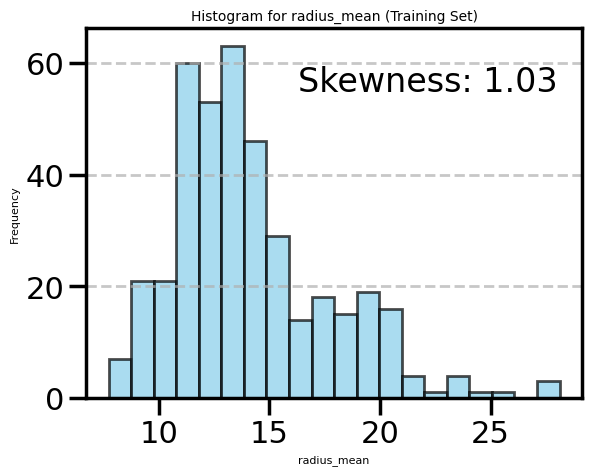

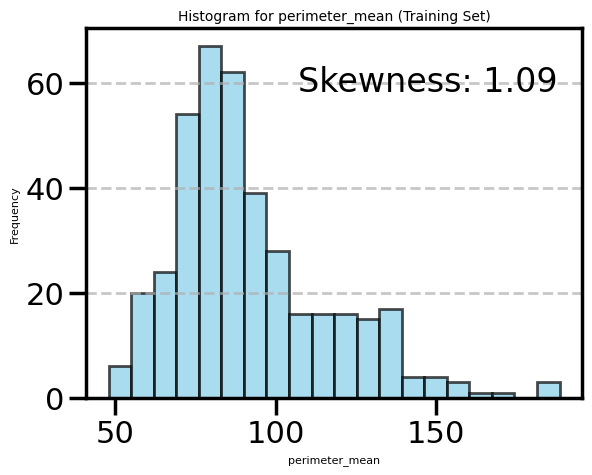

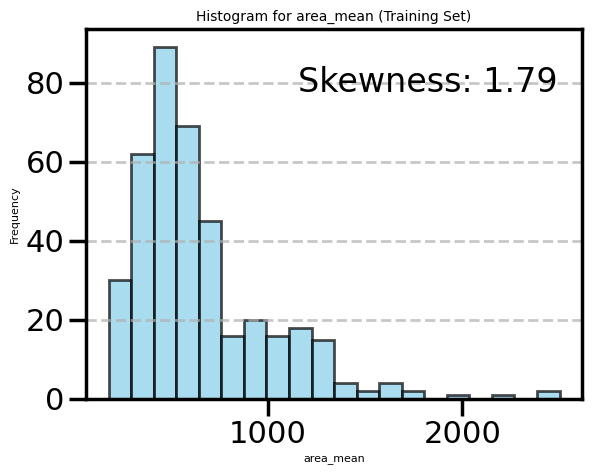

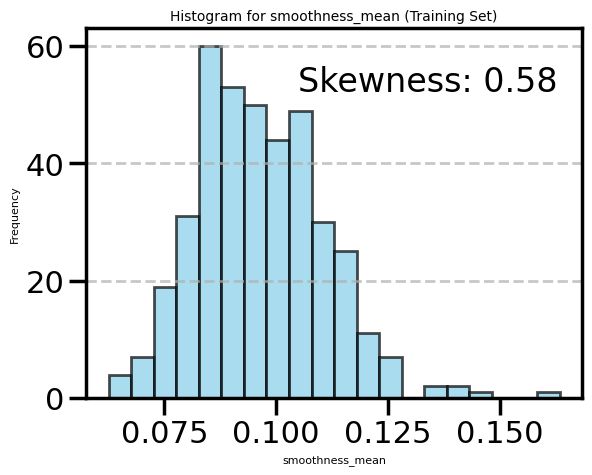

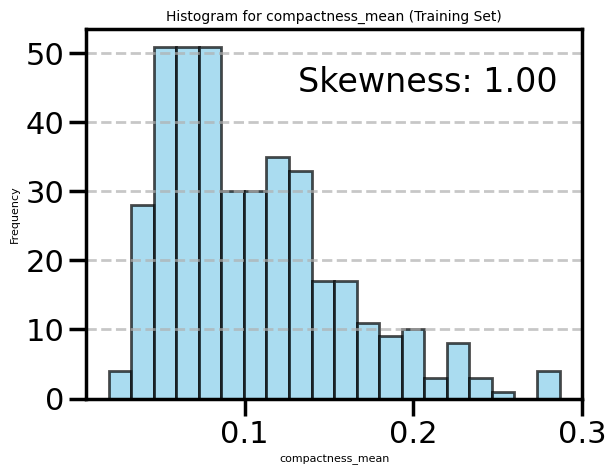

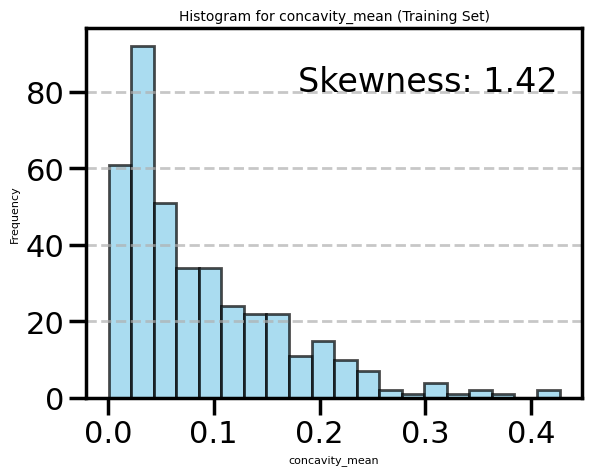

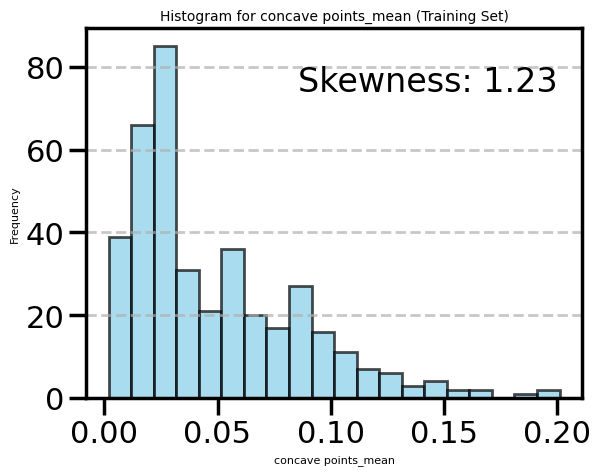

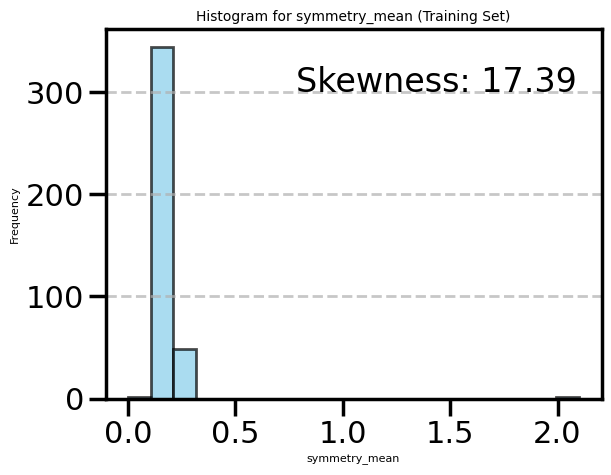

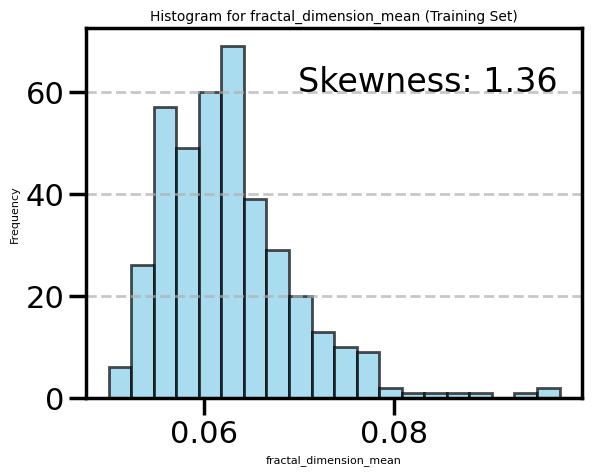

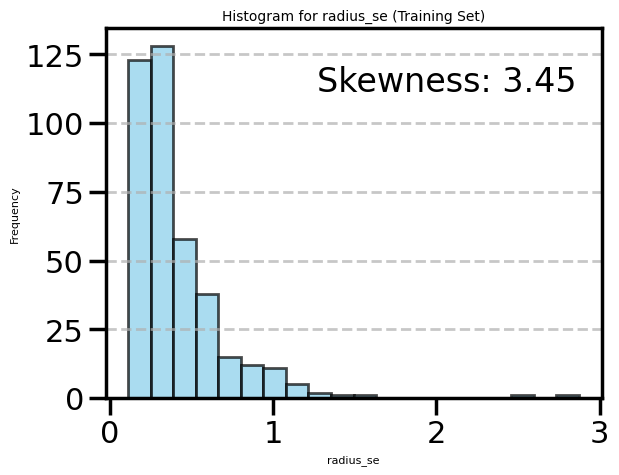

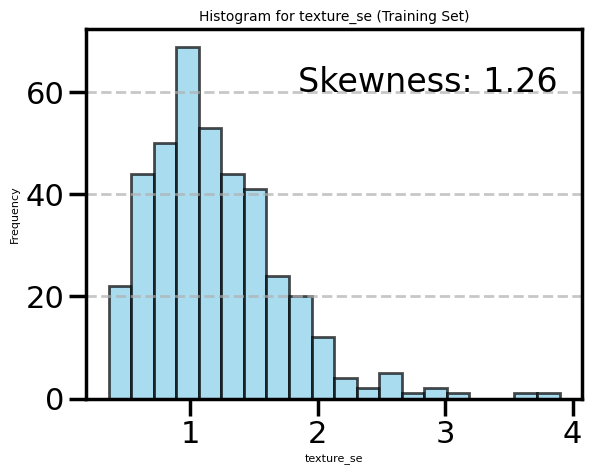

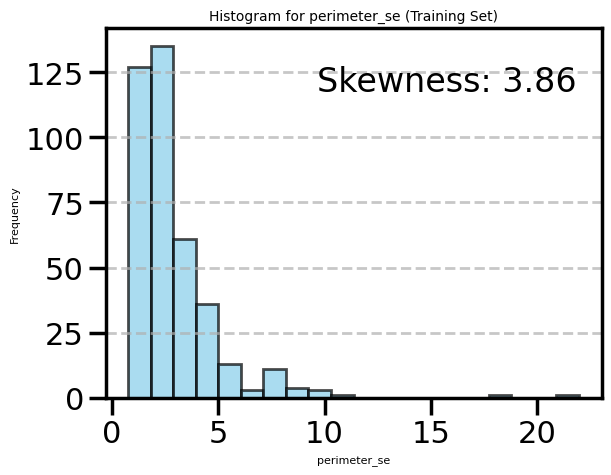

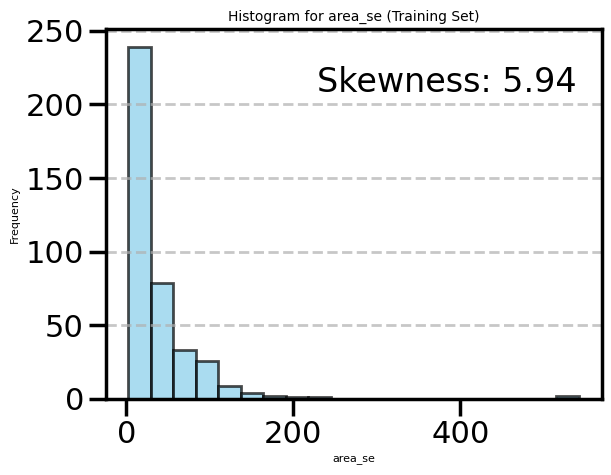

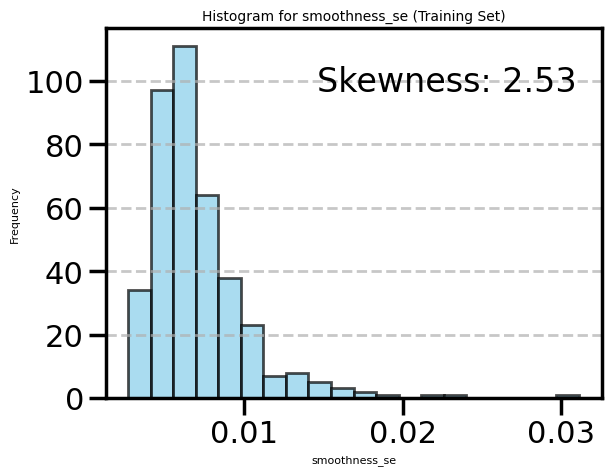

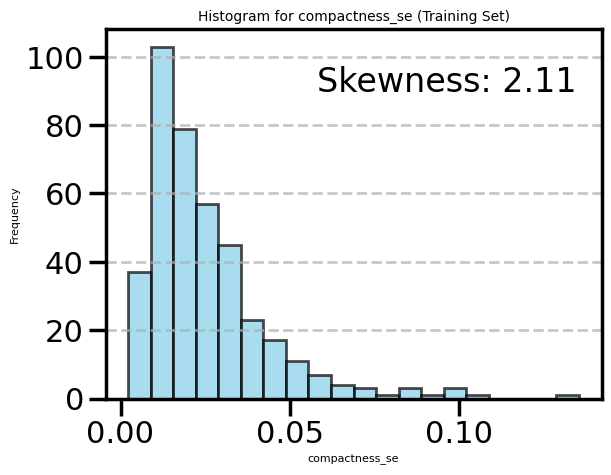

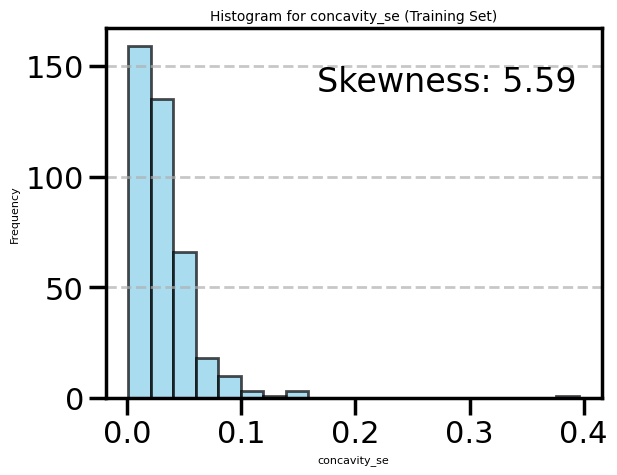

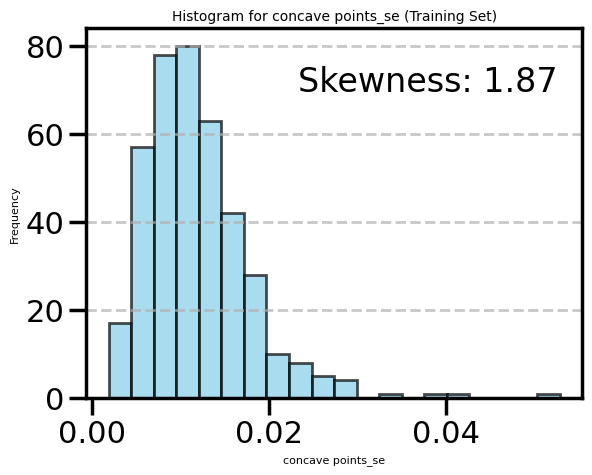

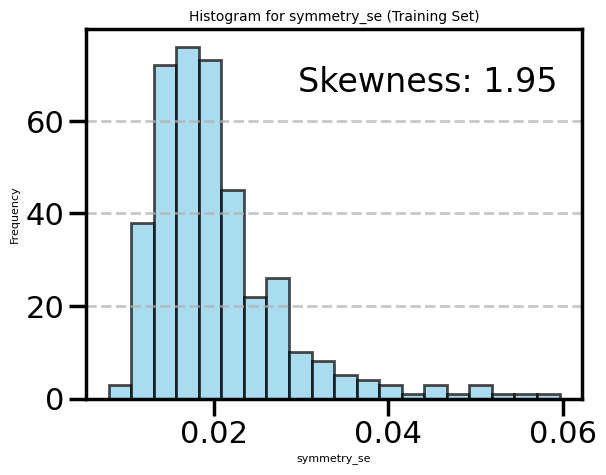

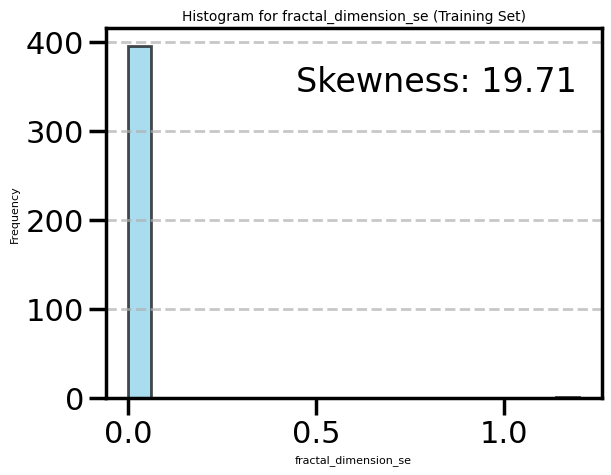

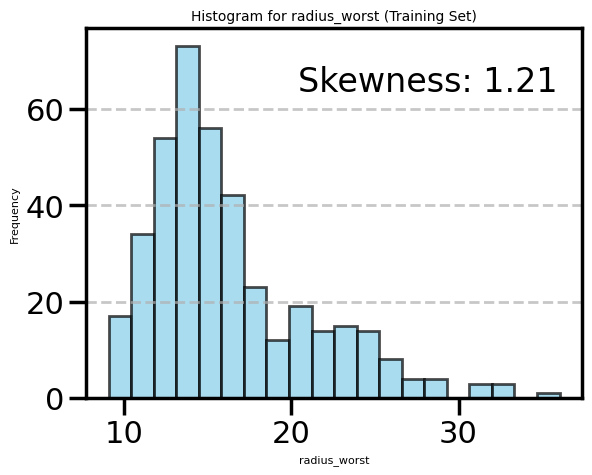

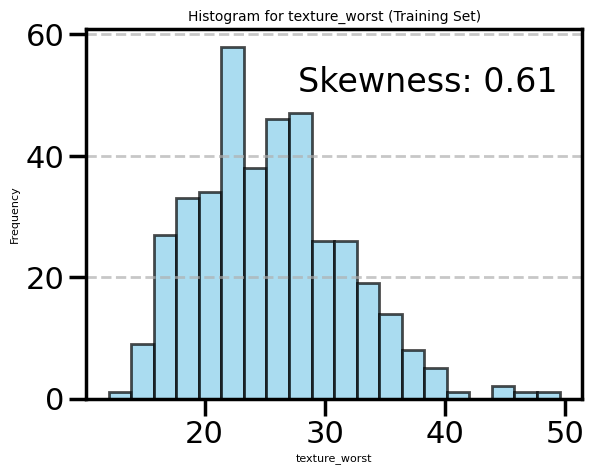

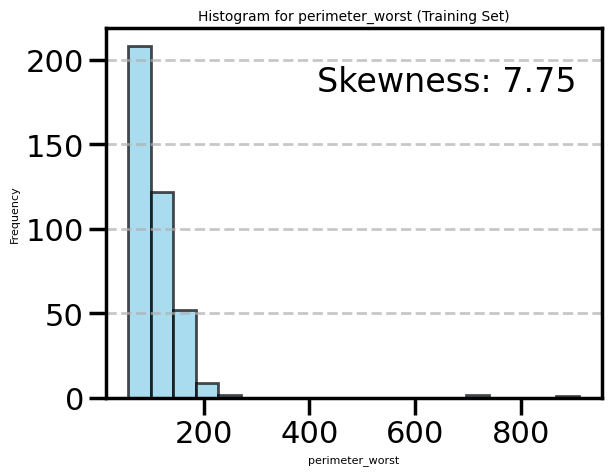

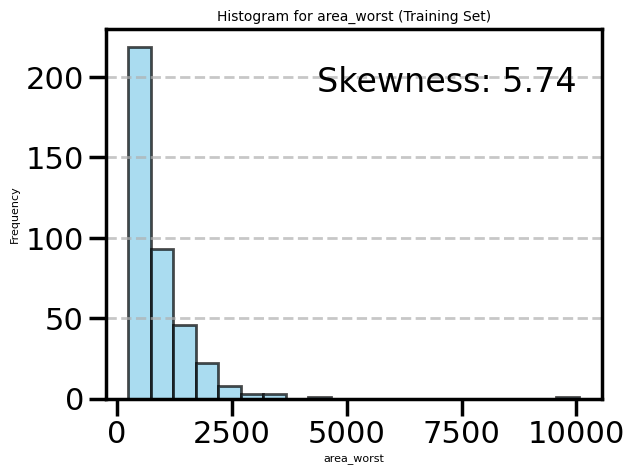

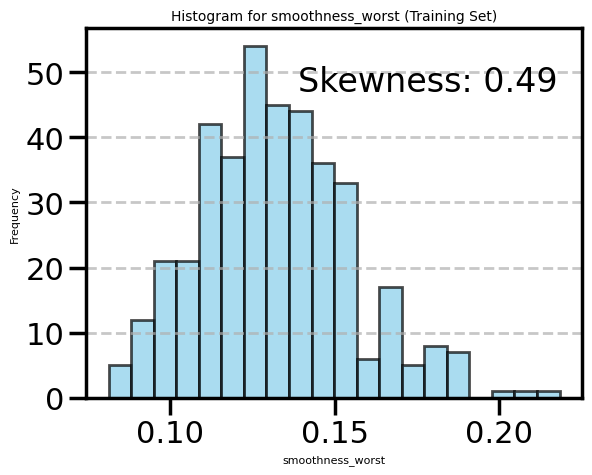

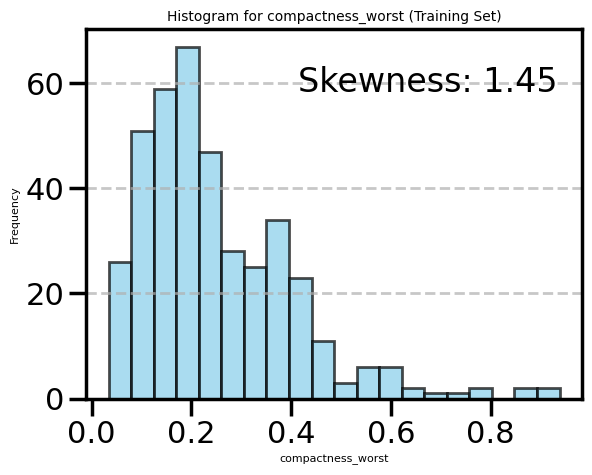

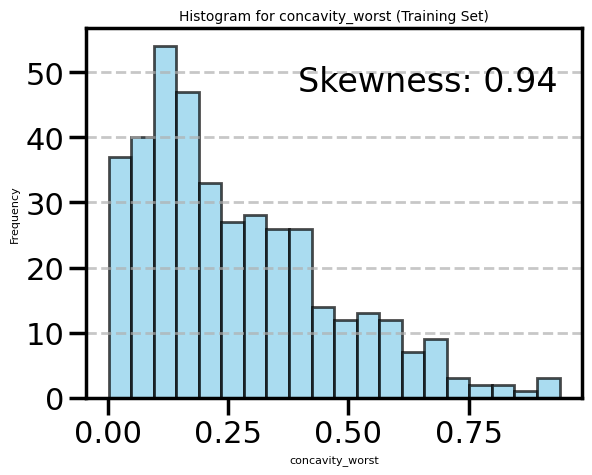

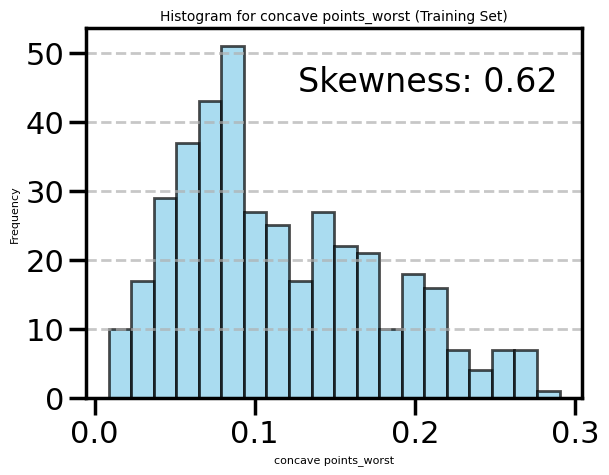

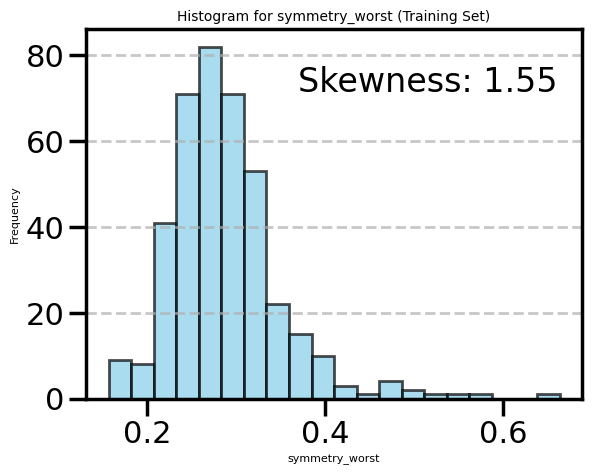

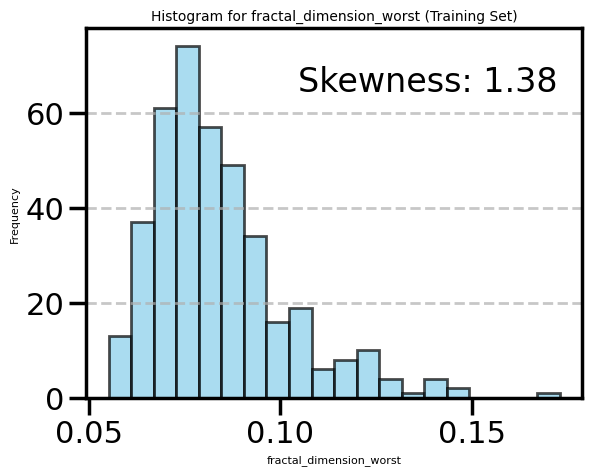

In [30]:
for variable in X_train.columns:
    plt.hist(X_train[variable], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Histogram for {variable} (Training Set)', fontsize=10)
    plt.xlabel(variable, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    skewness = skew(X_train[variable])
    plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.show()


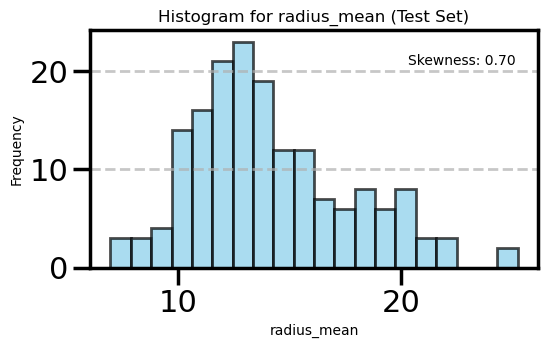

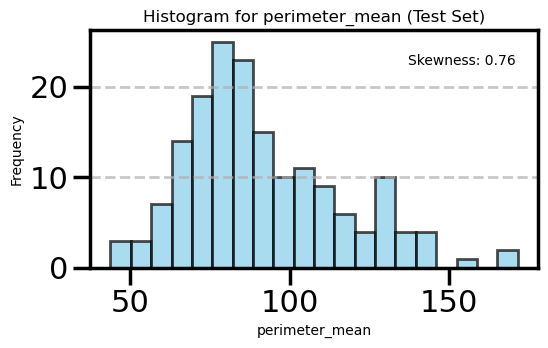

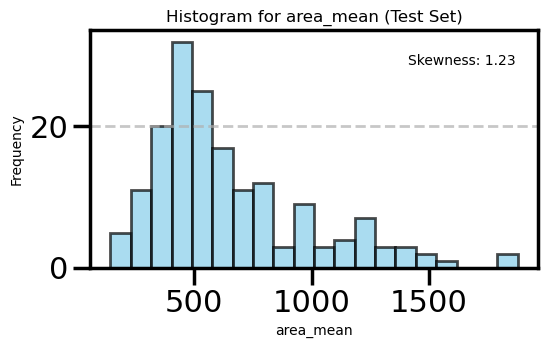

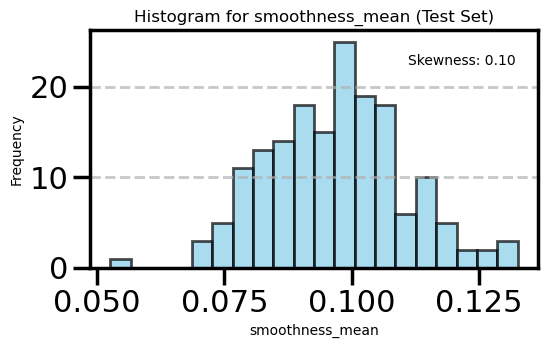

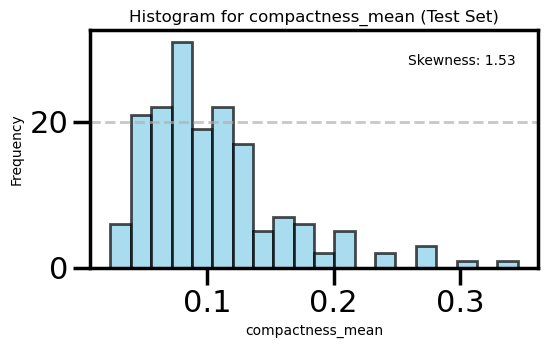

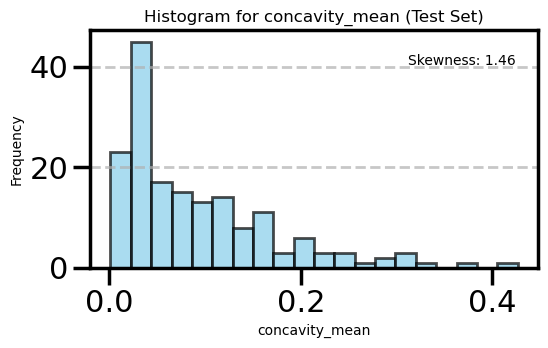

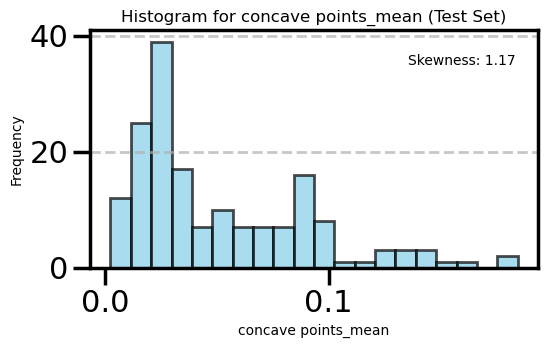

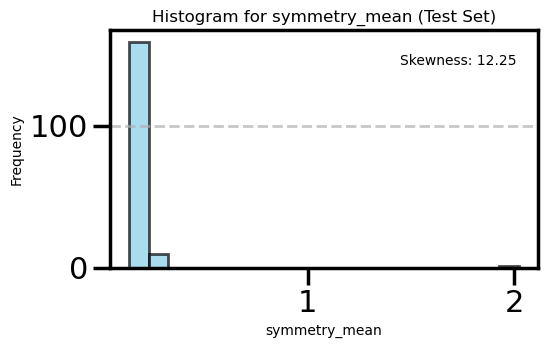

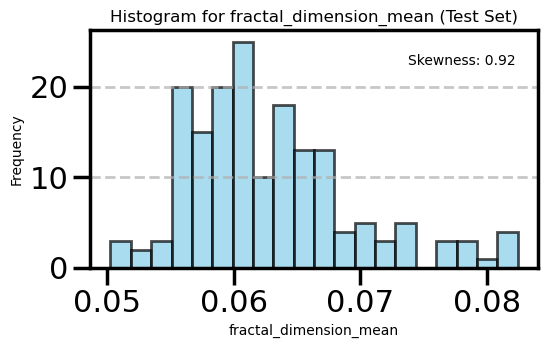

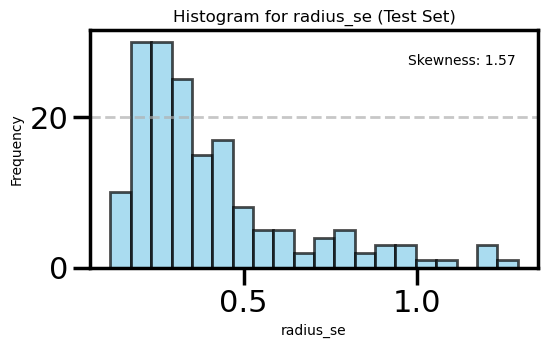

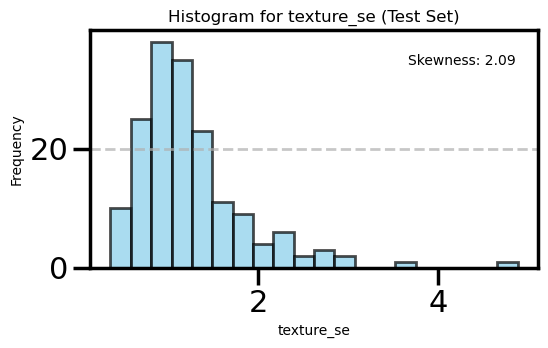

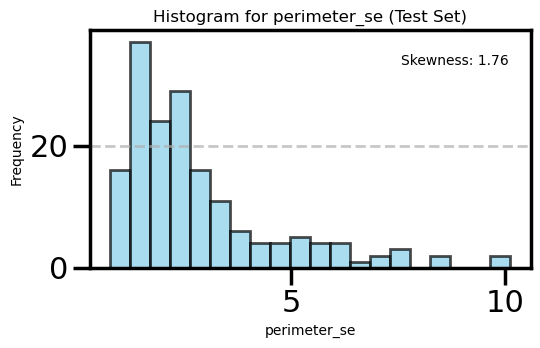

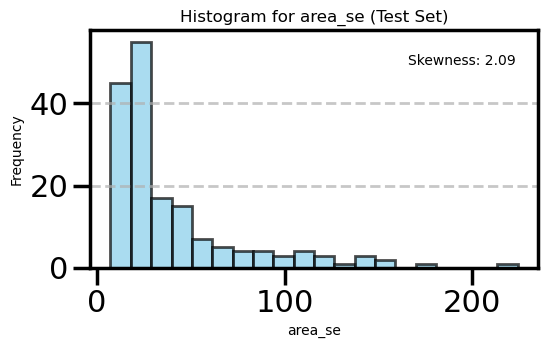

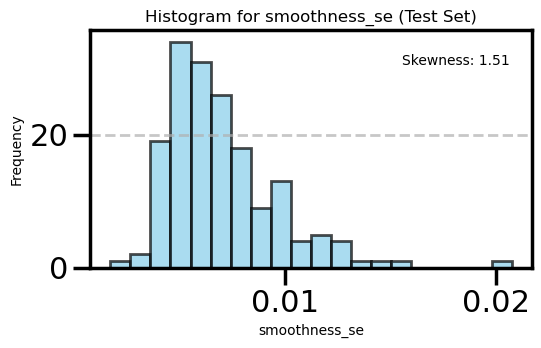

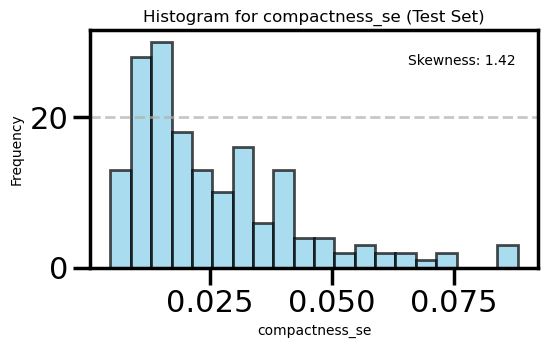

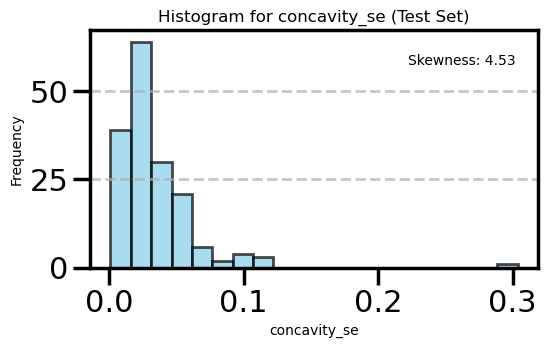

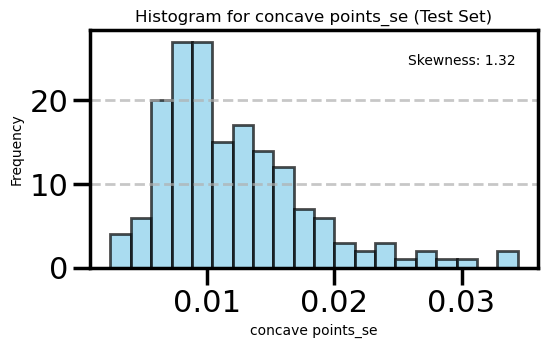

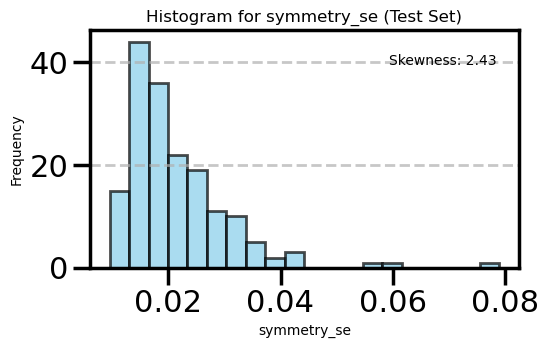

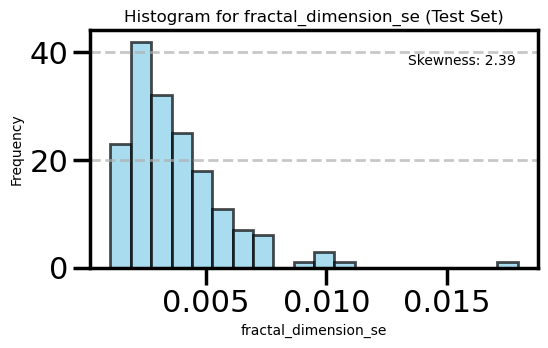

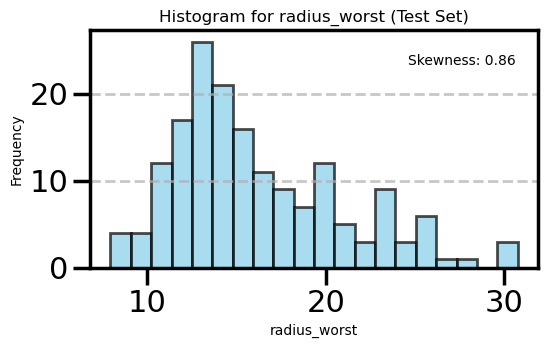

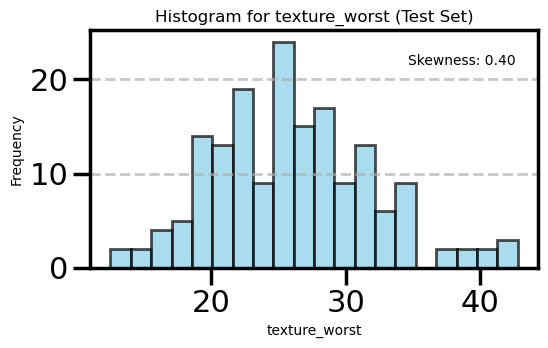

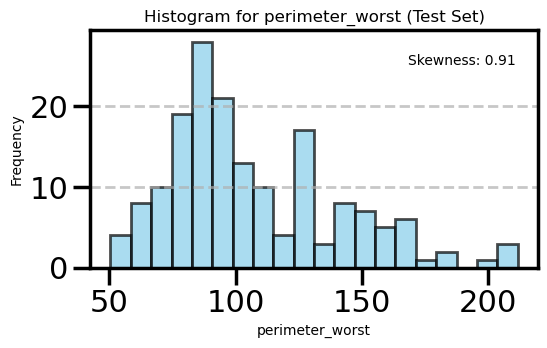

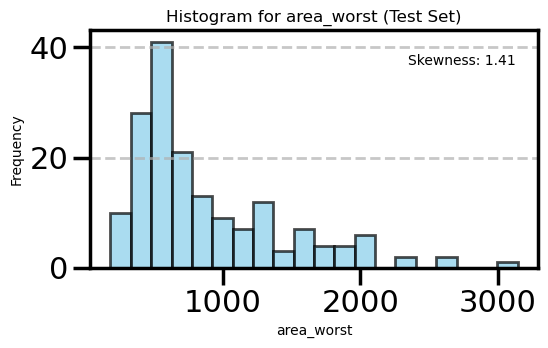

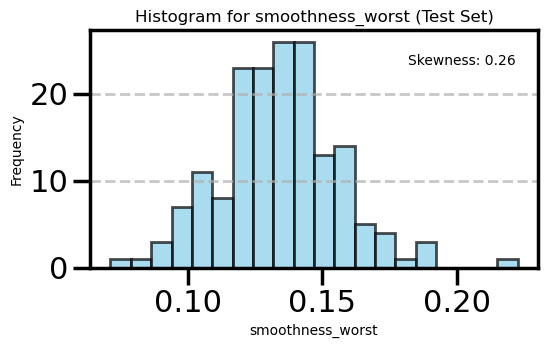

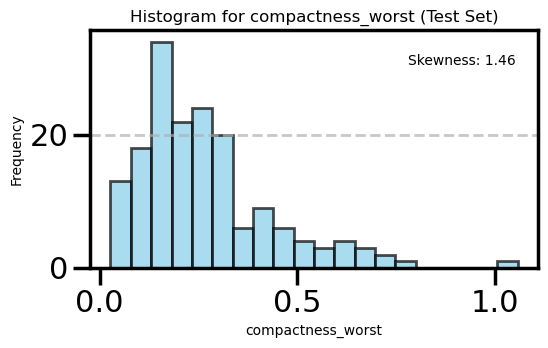

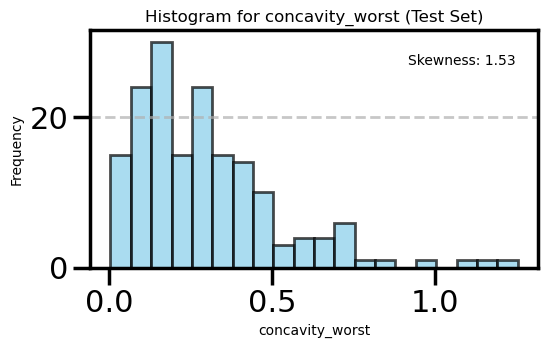

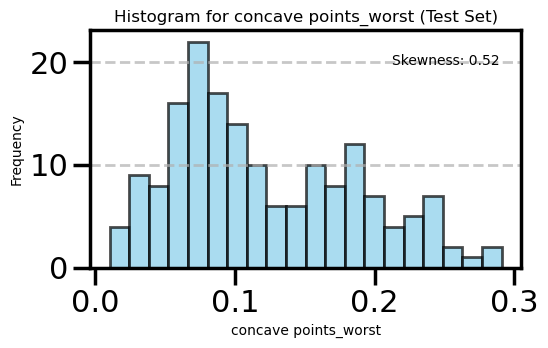

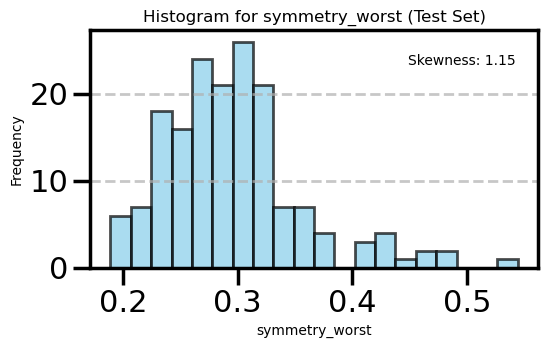

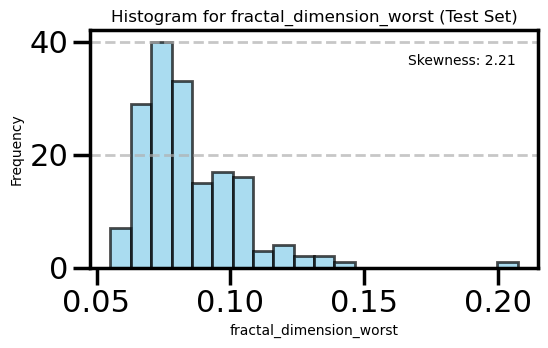

In [31]:
for variable in X_test.columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.hist(X_test[variable], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Histogram for {variable} (Test Set)', fontsize=12)
    plt.xlabel(variable, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    skewness = skew(X_test[variable])
    plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

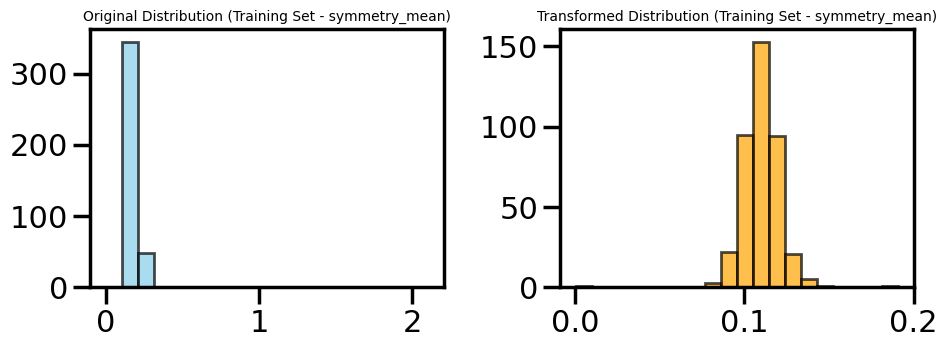

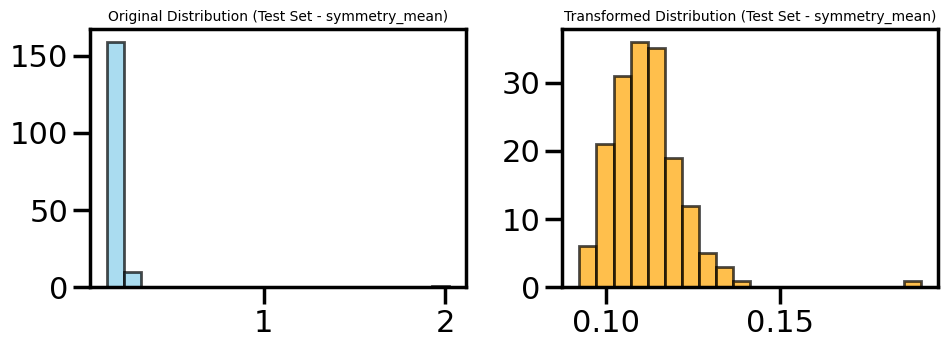

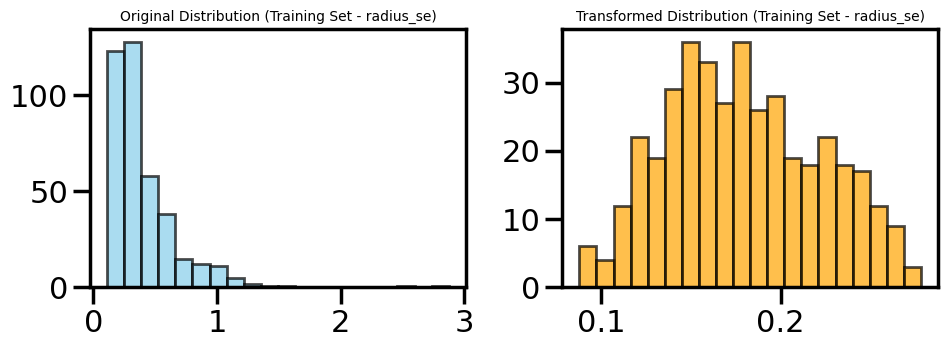

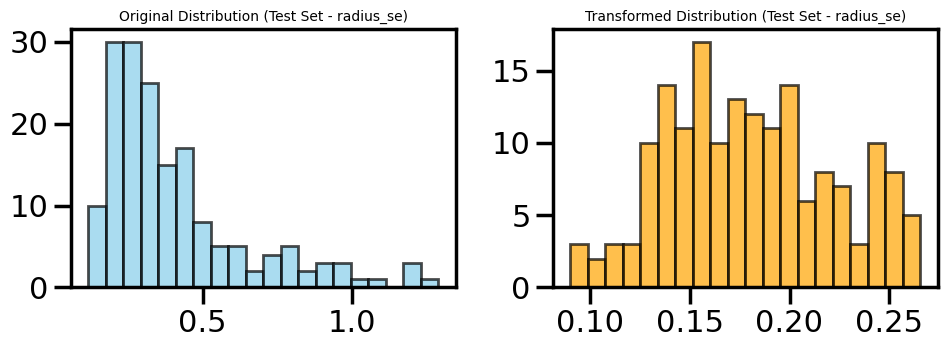

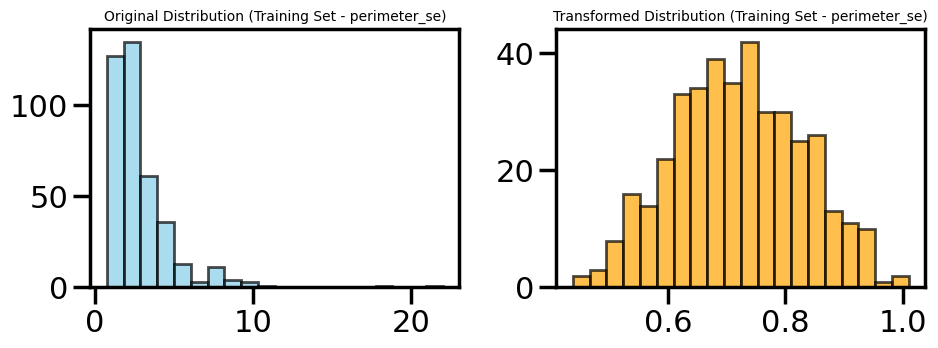

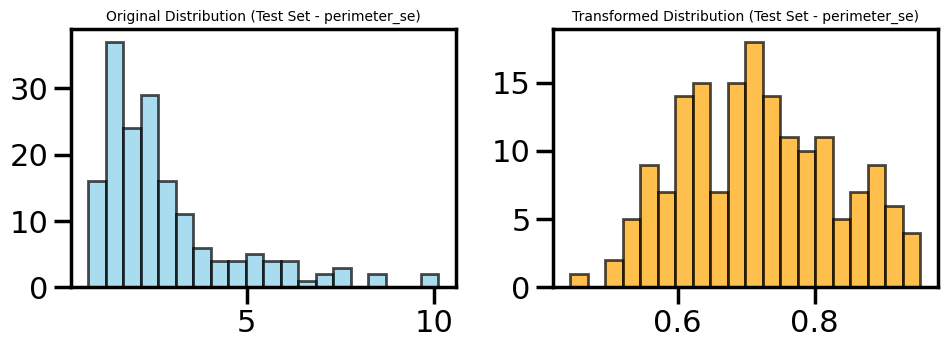

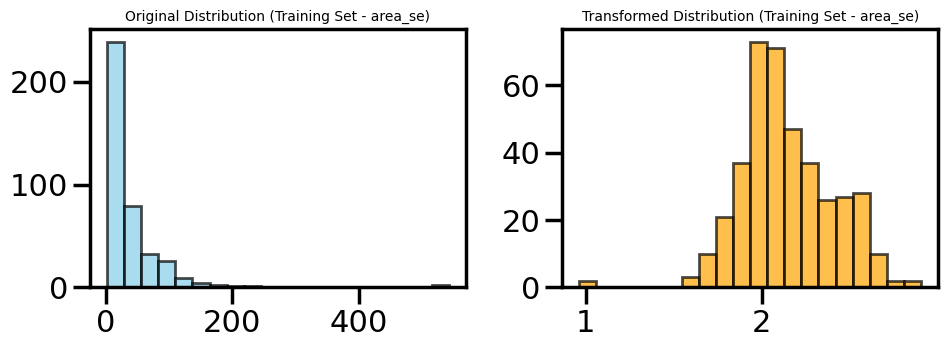

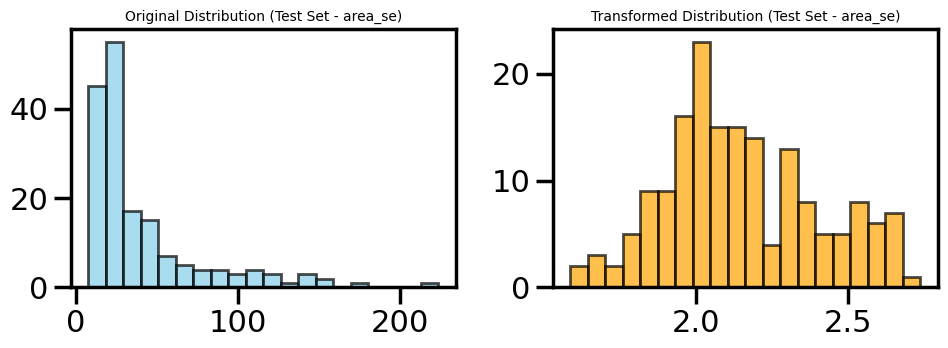

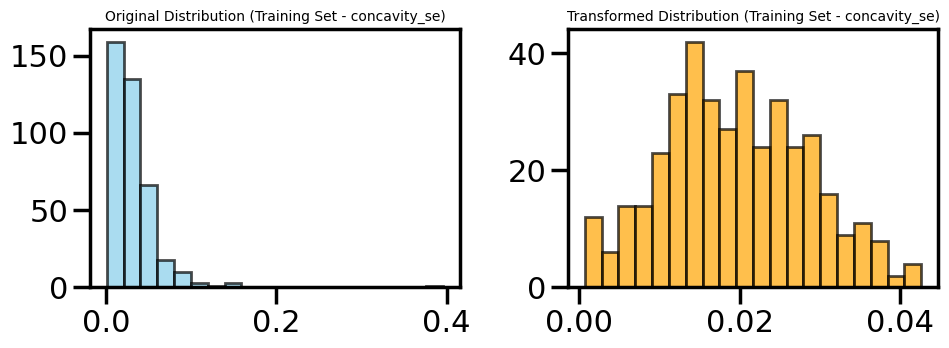

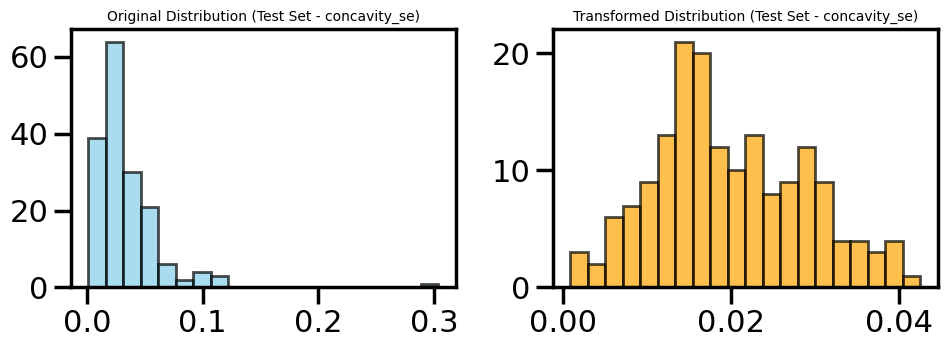

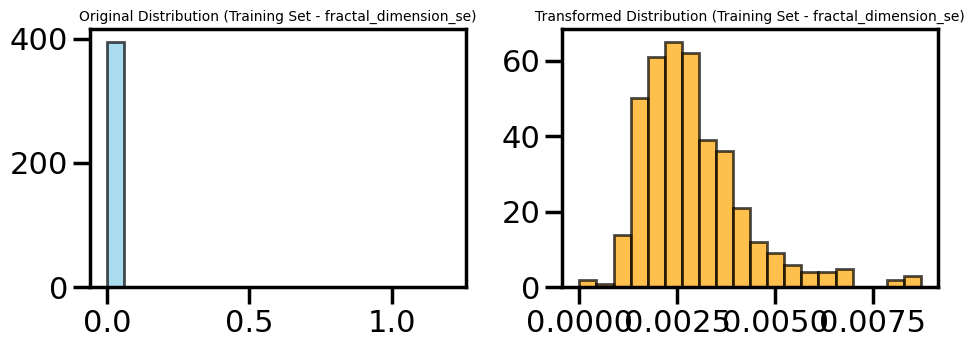

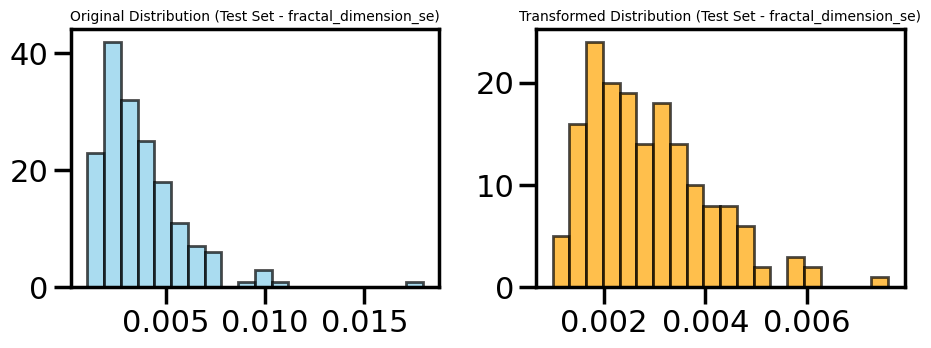

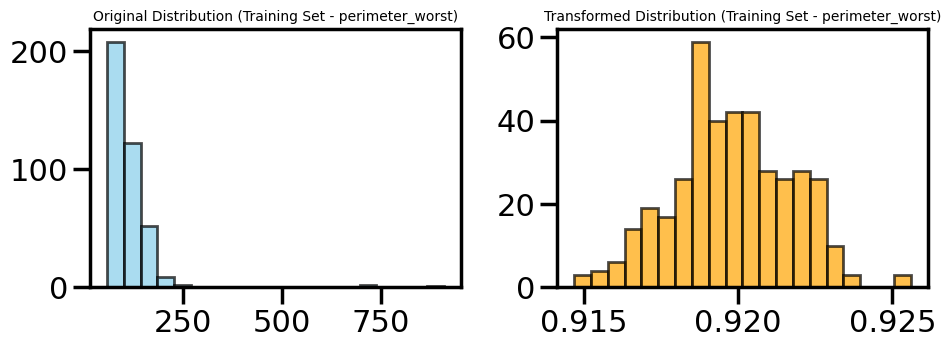

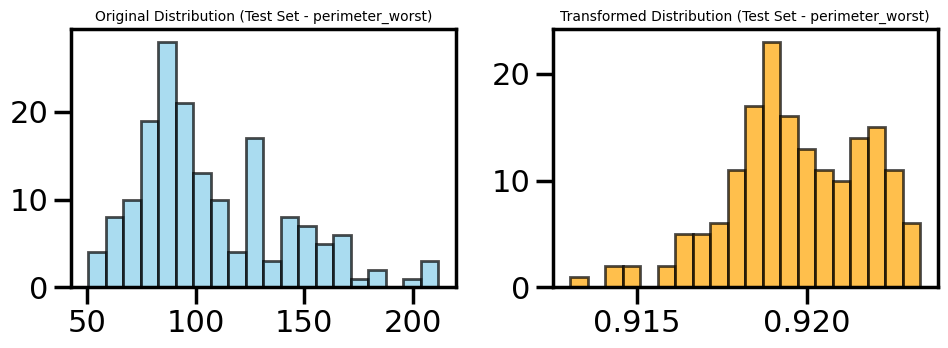

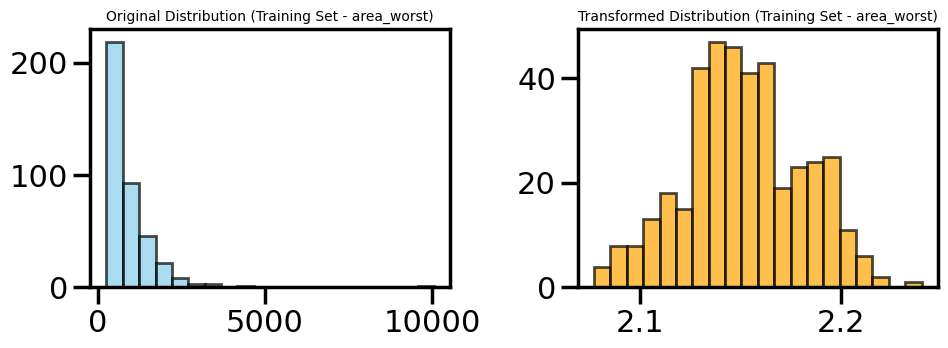

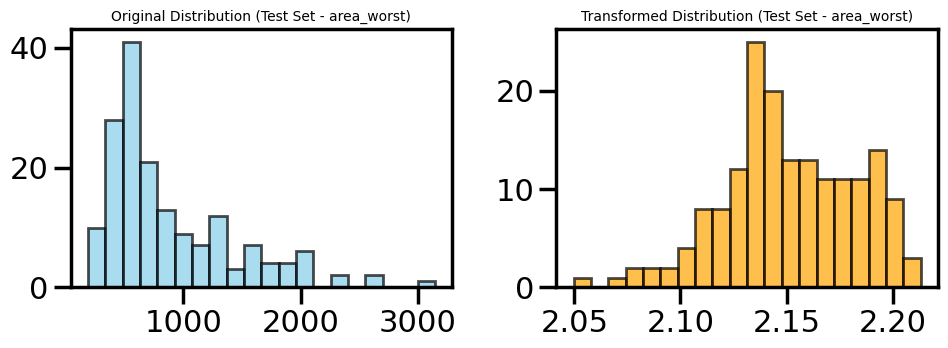

Feature  Original Skewness (Train)  \
0         symmetry_mean                  17.386063   
1             radius_se                   3.445799   
2          perimeter_se                   3.861897   
3               area_se                   5.939008   
4          concavity_se                   5.594148   
5  fractal_dimension_se                  19.714879   
6       perimeter_worst                   7.752660   
7            area_worst                   5.740575   

   Transformed Skewness (Train)  Original Skewness (Test)  \
0                     -1.155954                 12.248952   
1                      0.201723                  1.568552   
2                      0.071935                  1.764796   
3                     -0.052221                  2.086565   
4                      0.163786                  4.529782   
5                      1.414724                  2.386084   
6                      0.013088                  0.906287   
7                      0.028833                  1.405332   

   Transformed Skewness (Test)  
0                     2.425155  
1                     0.181072  
2                     0.131616  
3                     0.320258  
4                     0.281627  
5                     0.923502  
6                    -0.446022  
7                    -0.293219

In [32]:
features_to_transform = ['symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 
                         'concavity_se', 'fractal_dimension_se', 'perimeter_worst', 'area_worst']

# Copy original DataFrames
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

# Lists to store original and transformed skewness values for training and test sets
original_train_skewness = []
transformed_train_skewness = []
original_test_skewness = []
transformed_test_skewness = []

# Loop through selected features
for column in features_to_transform:
    if X_train[column].dtype != 'object':  # Check if the column is numerical
        # Transform training set
        transformed_variable_train, lambda_value_train = boxcox(X_train[column] + 1)
        X_train_transformed[column] = transformed_variable_train

        # Store skewness values
        original_train_skewness.append(skew(X_train[column]))
        transformed_train_skewness.append(skew(transformed_variable_train))

        # Plot original and transformed distributions for training set
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.hist(X_train[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Original Distribution (Training Set - {column})', fontsize=10)

        plt.subplot(1, 2, 2)
        plt.hist(transformed_variable_train, bins=20, color='orange', edgecolor='black', alpha=0.7)
        plt.title(f'Transformed Distribution (Training Set - {column})', fontsize=10)

        plt.tight_layout()
        plt.show()
        
        # Transform test set using lambda value from training set
        transformed_variable_test = boxcox(X_test[column] + 1, lmbda=lambda_value_train)
        X_test_transformed[column] = transformed_variable_test

        # Store test set skewness values
        original_test_skewness.append(skew(X_test[column]))
        transformed_test_skewness.append(skew(transformed_variable_test))

        # Plot original and transformed distributions for test set
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.hist(X_test[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Original Distribution (Test Set - {column})', fontsize=10)

        plt.subplot(1, 2, 2)
        plt.hist(transformed_variable_test, bins=20, color='orange', edgecolor='black', alpha=0.7)
        plt.title(f'Transformed Distribution (Test Set - {column})', fontsize=10)

        plt.tight_layout()
        plt.show()

# Print skewness values
pd.DataFrame({
    'Feature': features_to_transform,
    'Original Skewness (Train)': original_train_skewness,
    'Transformed Skewness (Train)': transformed_train_skewness,
    'Original Skewness (Test)': original_test_skewness,
    'Transformed Skewness (Test)': transformed_test_skewness
})

<b>The code above evaluates the optimal lambda value from training set and applies it to the test set. The reason for estimating the transformation parameters only from the training data is to prevent data leakage and ensure that the test data remains unseen during the preprocessing steps. This helps maintain the integrity of the test set as a fair evaluation of the model's performance on new, unseen data. 

The probability plot below, verifies that the transformed variables follows a normal distribution</b>

<H5> PROBABILTY PLOT</H5>

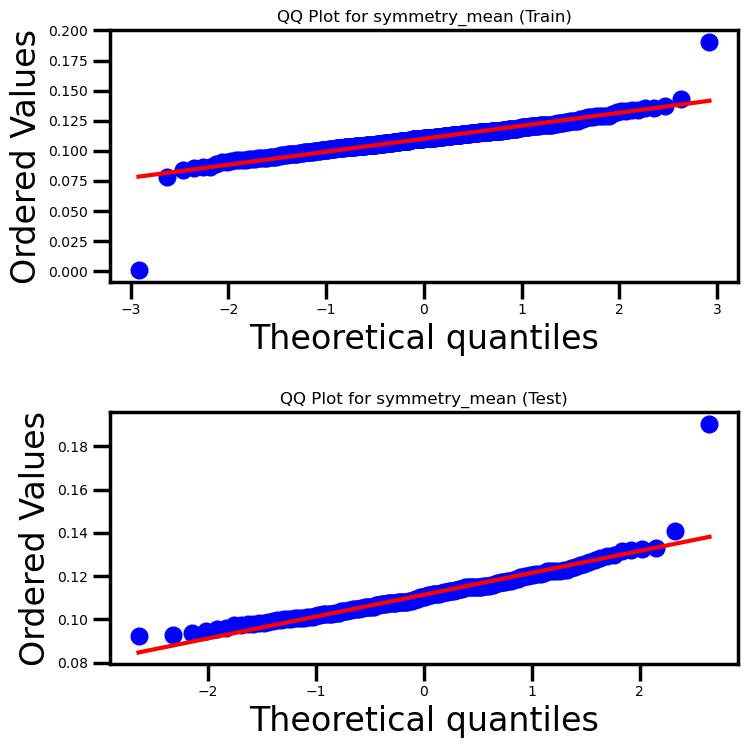

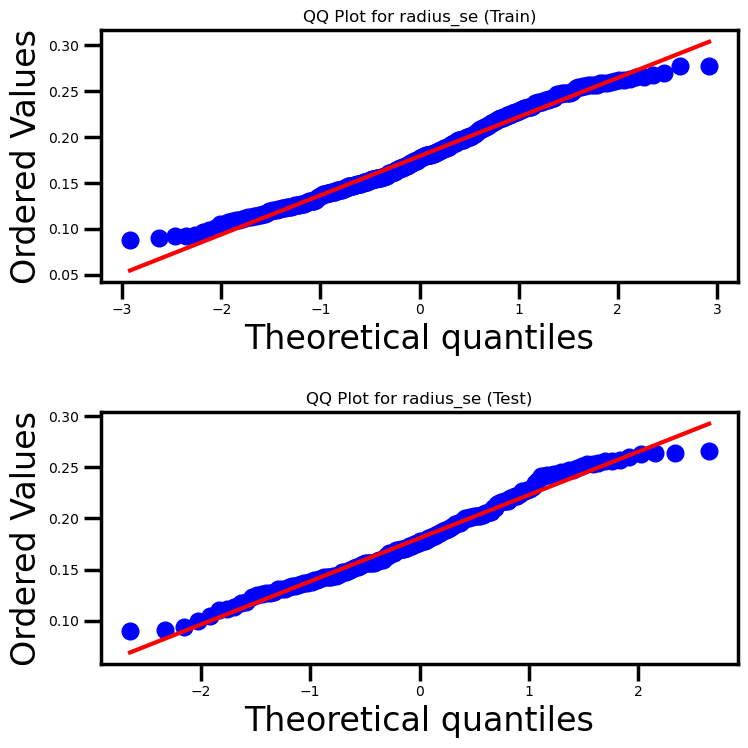

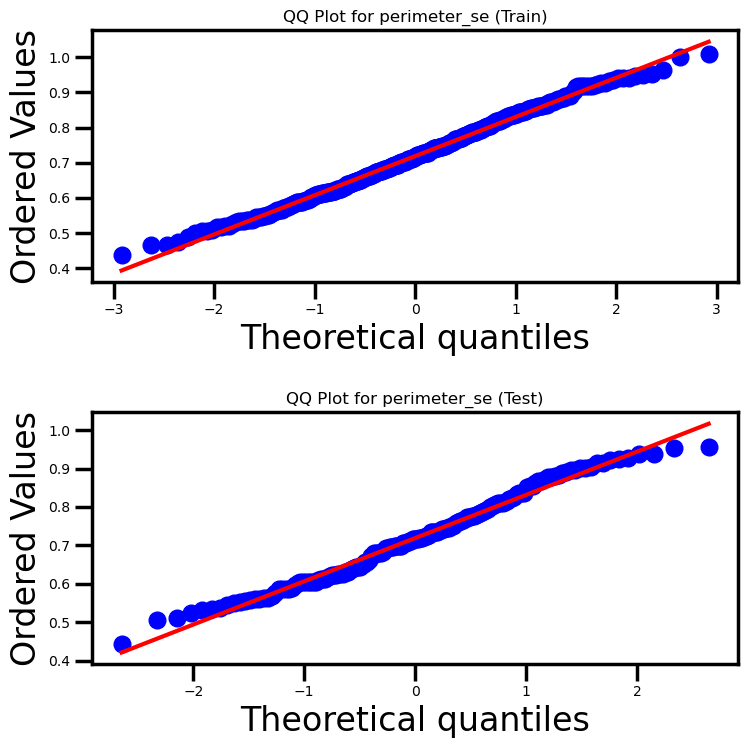

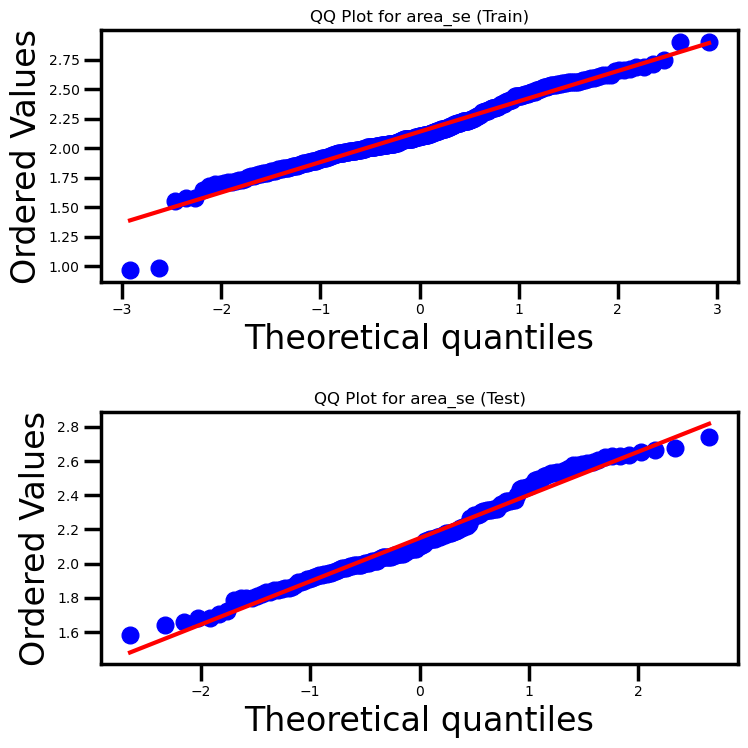

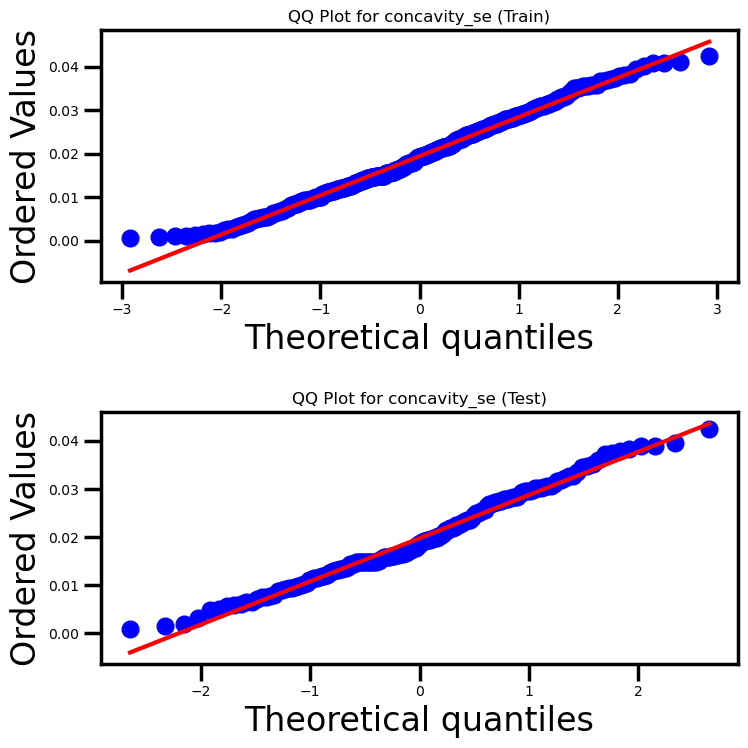

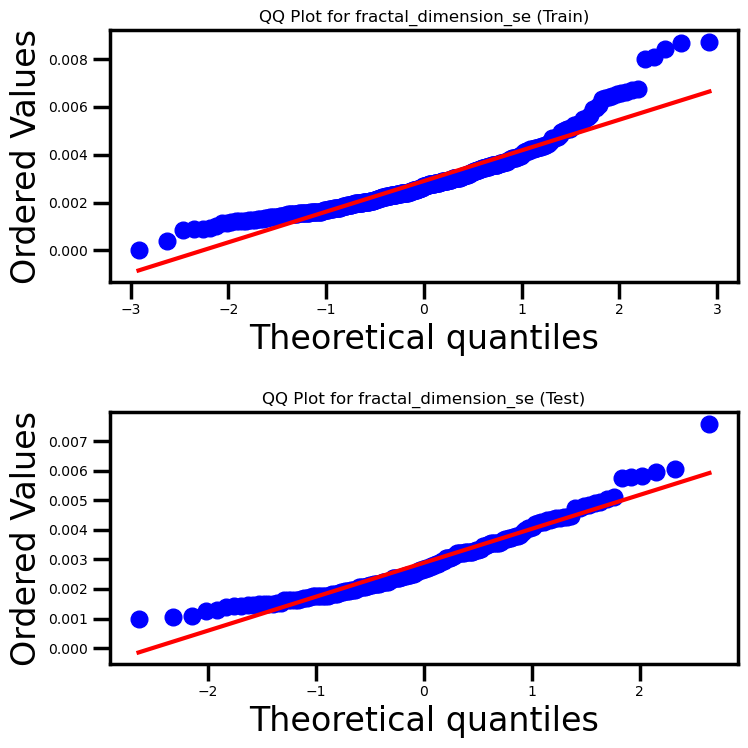

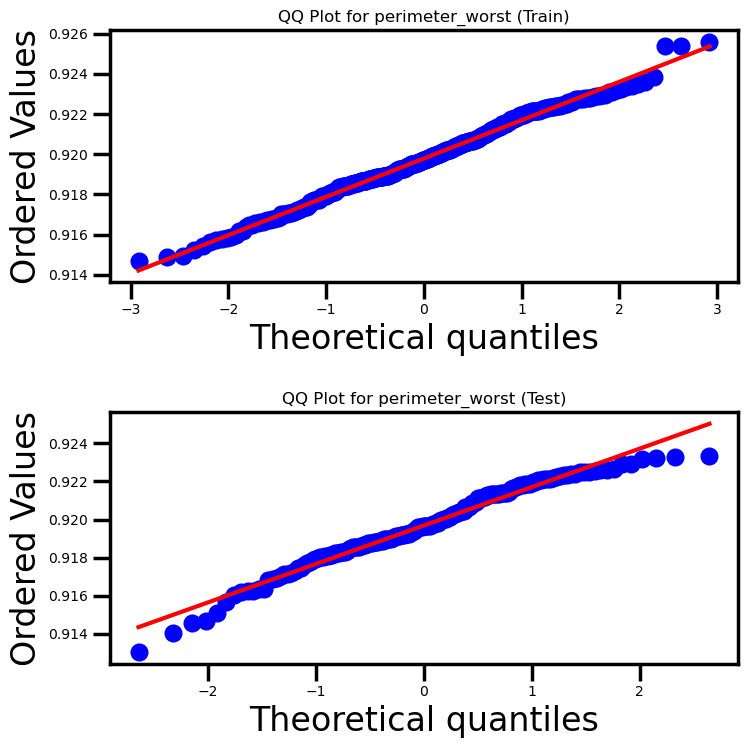

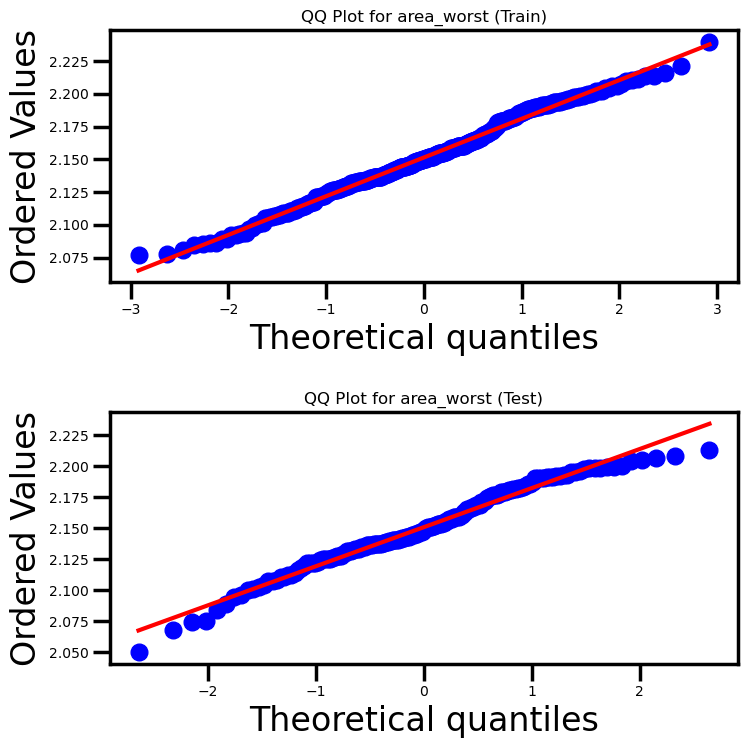

In [34]:
def plot_qq(feature_name, transformed_train, transformed_test):
    plt.figure(figsize=(8, 8))
    
    # Train set QQ plot
    ax1 = plt.subplot(2, 1, 1)
    probplot(transformed_train, dist="norm", plot=ax1)
    ax1.set_title(f'QQ Plot for {feature_name} (Train)', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    
    # Test set QQ plot
    ax2 = plt.subplot(2, 1, 2)
    probplot(transformed_test, dist="norm", plot=ax2)
    ax2.set_title(f'QQ Plot for {feature_name} (Test)', fontsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    plt.tight_layout()
    plt.show()

# Loop through transformed features
for column in features_to_transform:
    plot_qq(column, X_train_transformed[column], X_test_transformed[column])

<H5> FEATURE SCALING(STANDARDIZATION)</H5>

In [35]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [36]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

<H4> FEATURE REDUCTION</H4>

<Axes: >

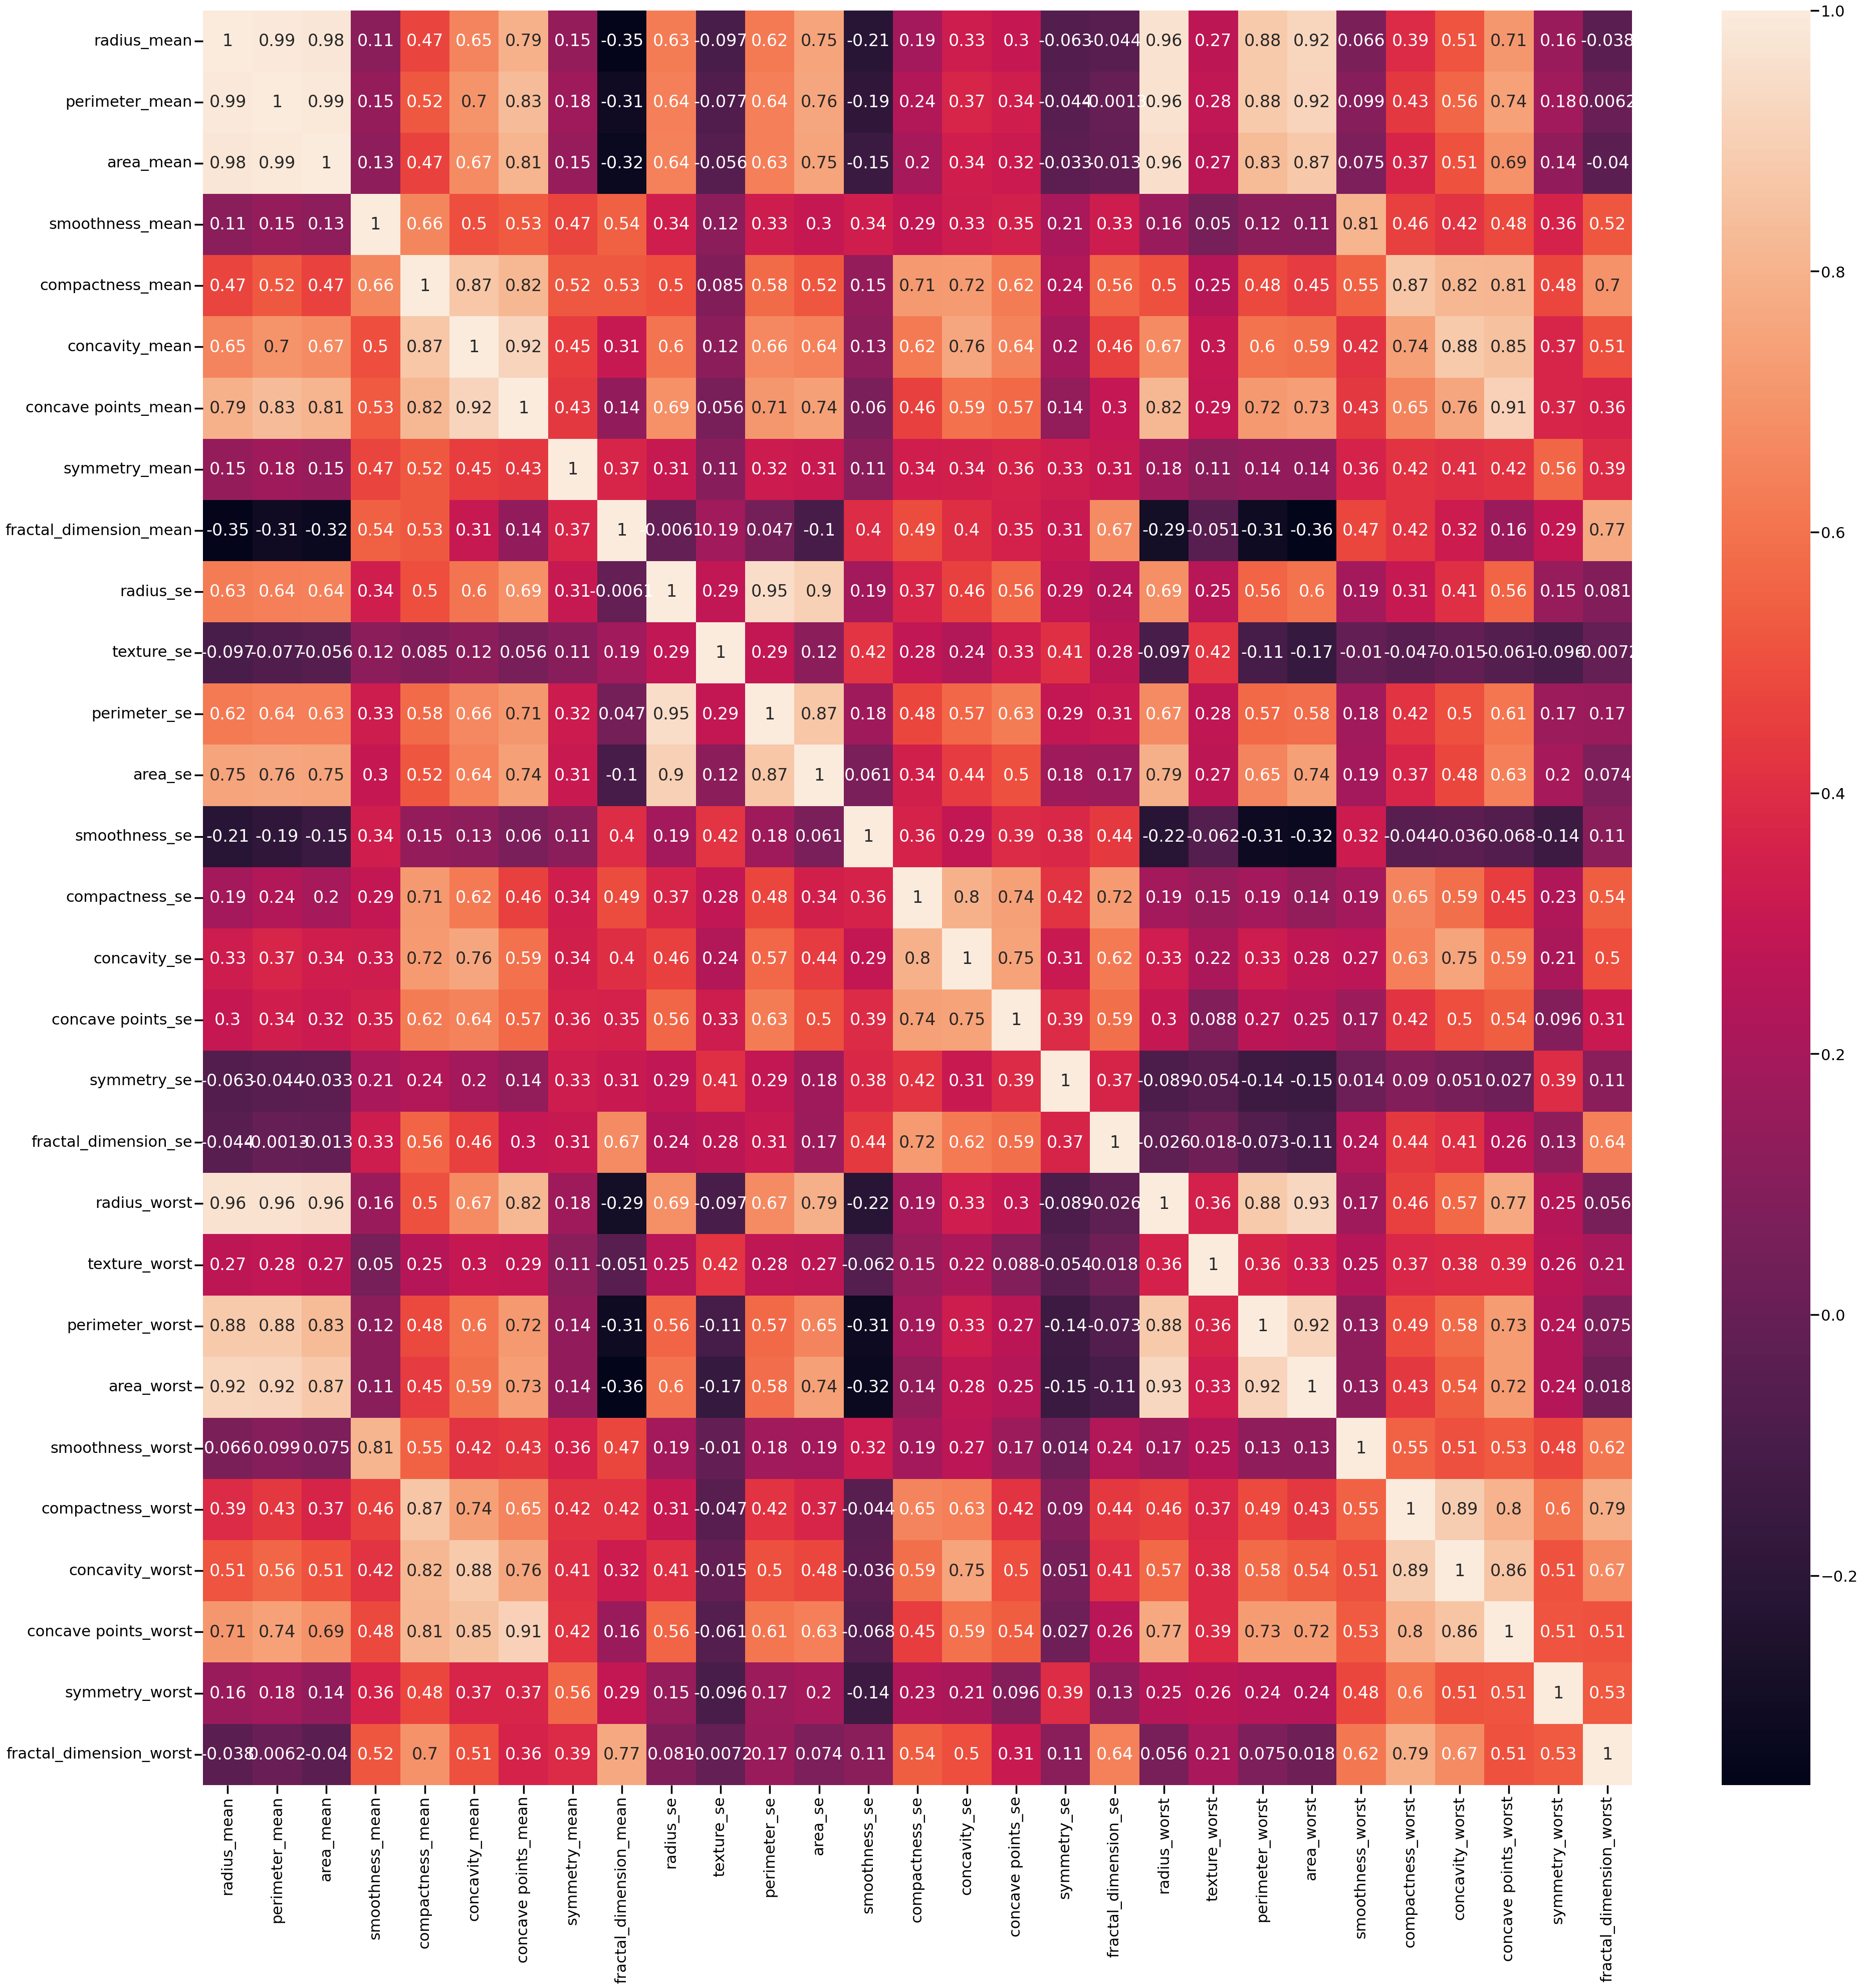

In [37]:
plt.figure(figsize=(46,46))
sns.heatmap(X_train_scaled_df.corr(), annot=True)

In [38]:
variables = ['radius_worst', 
        'texture_worst',  
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'fractal_dimension_worst']
X_train_scaled_df = X_train_scaled_df.drop(variables, axis=1)

variables = ['perimeter_mean',
        'perimeter_se', 
        'radius_mean', 
        'radius_se']
X_train_scaled_df = X_train_scaled_df.drop(variables, axis=1)

variables = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
X_train_scaled_df = X_train_scaled_df.drop(variables, axis=1)

variables = ['area_se',
        'compactness_se']
X_train_scaled_df = X_train_scaled_df.drop(variables, axis=1)

<Axes: >

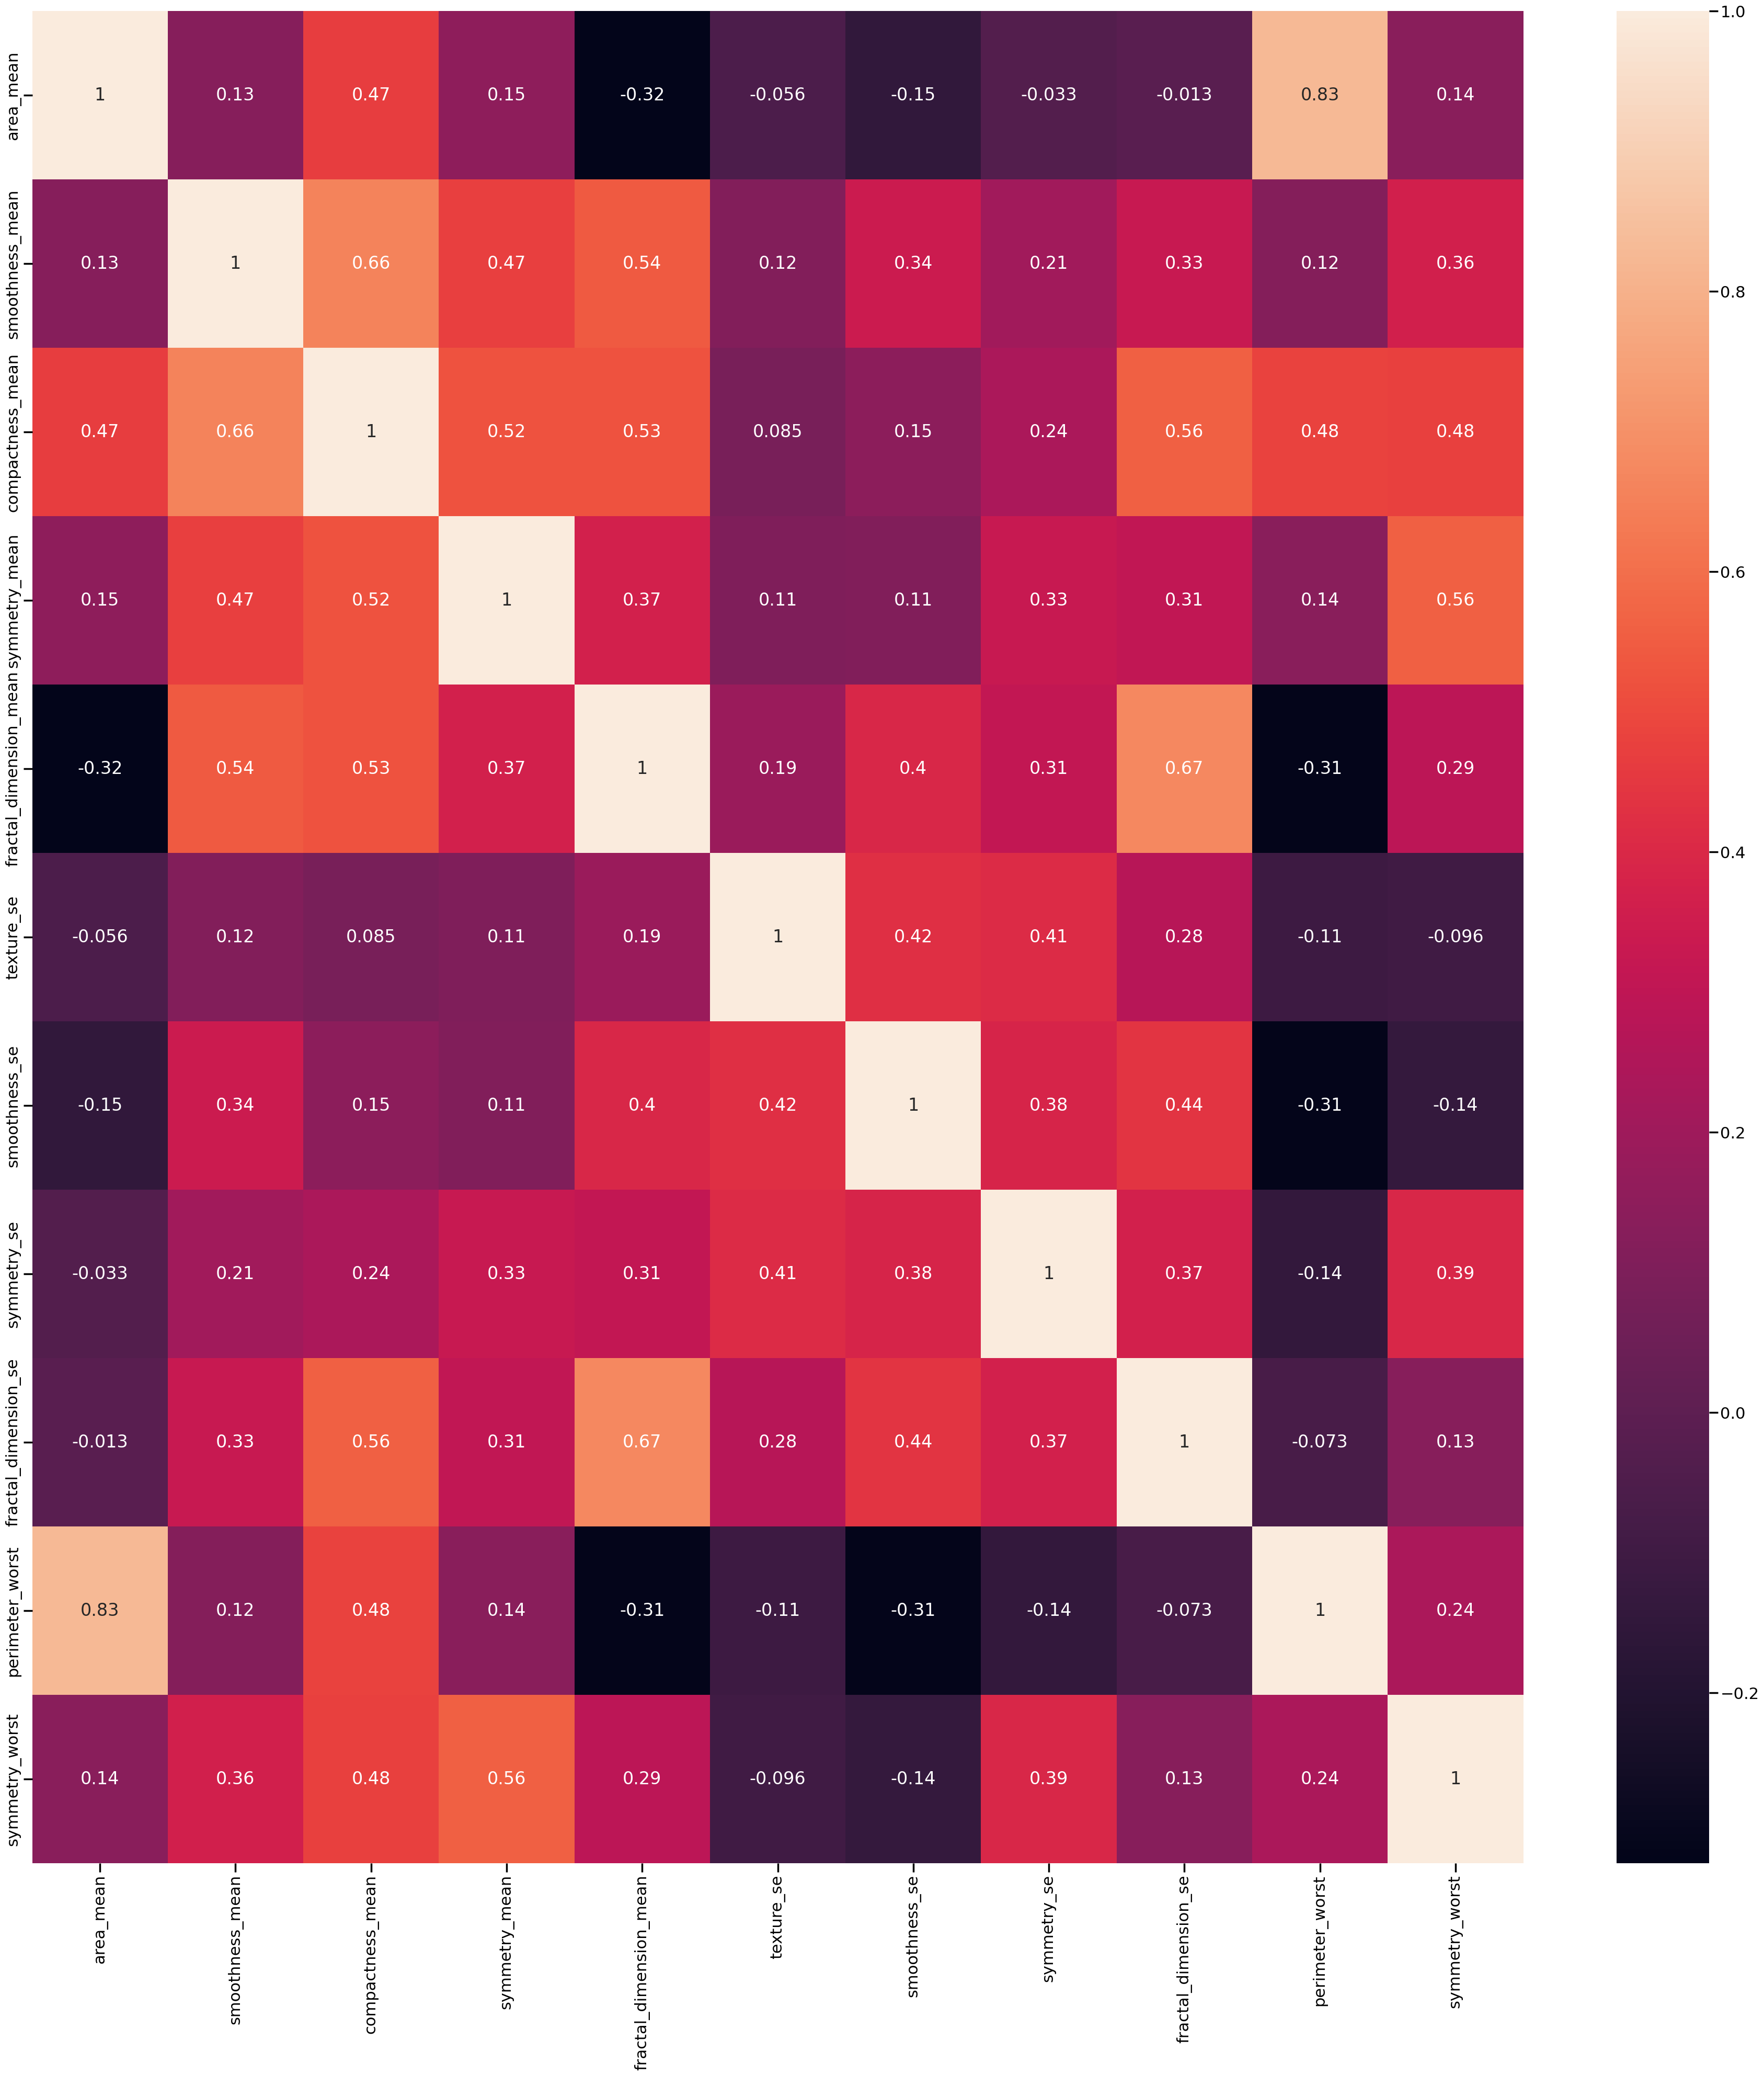

In [39]:
plt.figure(figsize=(46,46))
sns.heatmap(X_train_scaled_df.corr(), annot=True)

In [40]:
variables = ['perimeter_worst']
X_train_scaled_df = X_train_scaled_df.drop(variables, axis=1)

<Axes: >

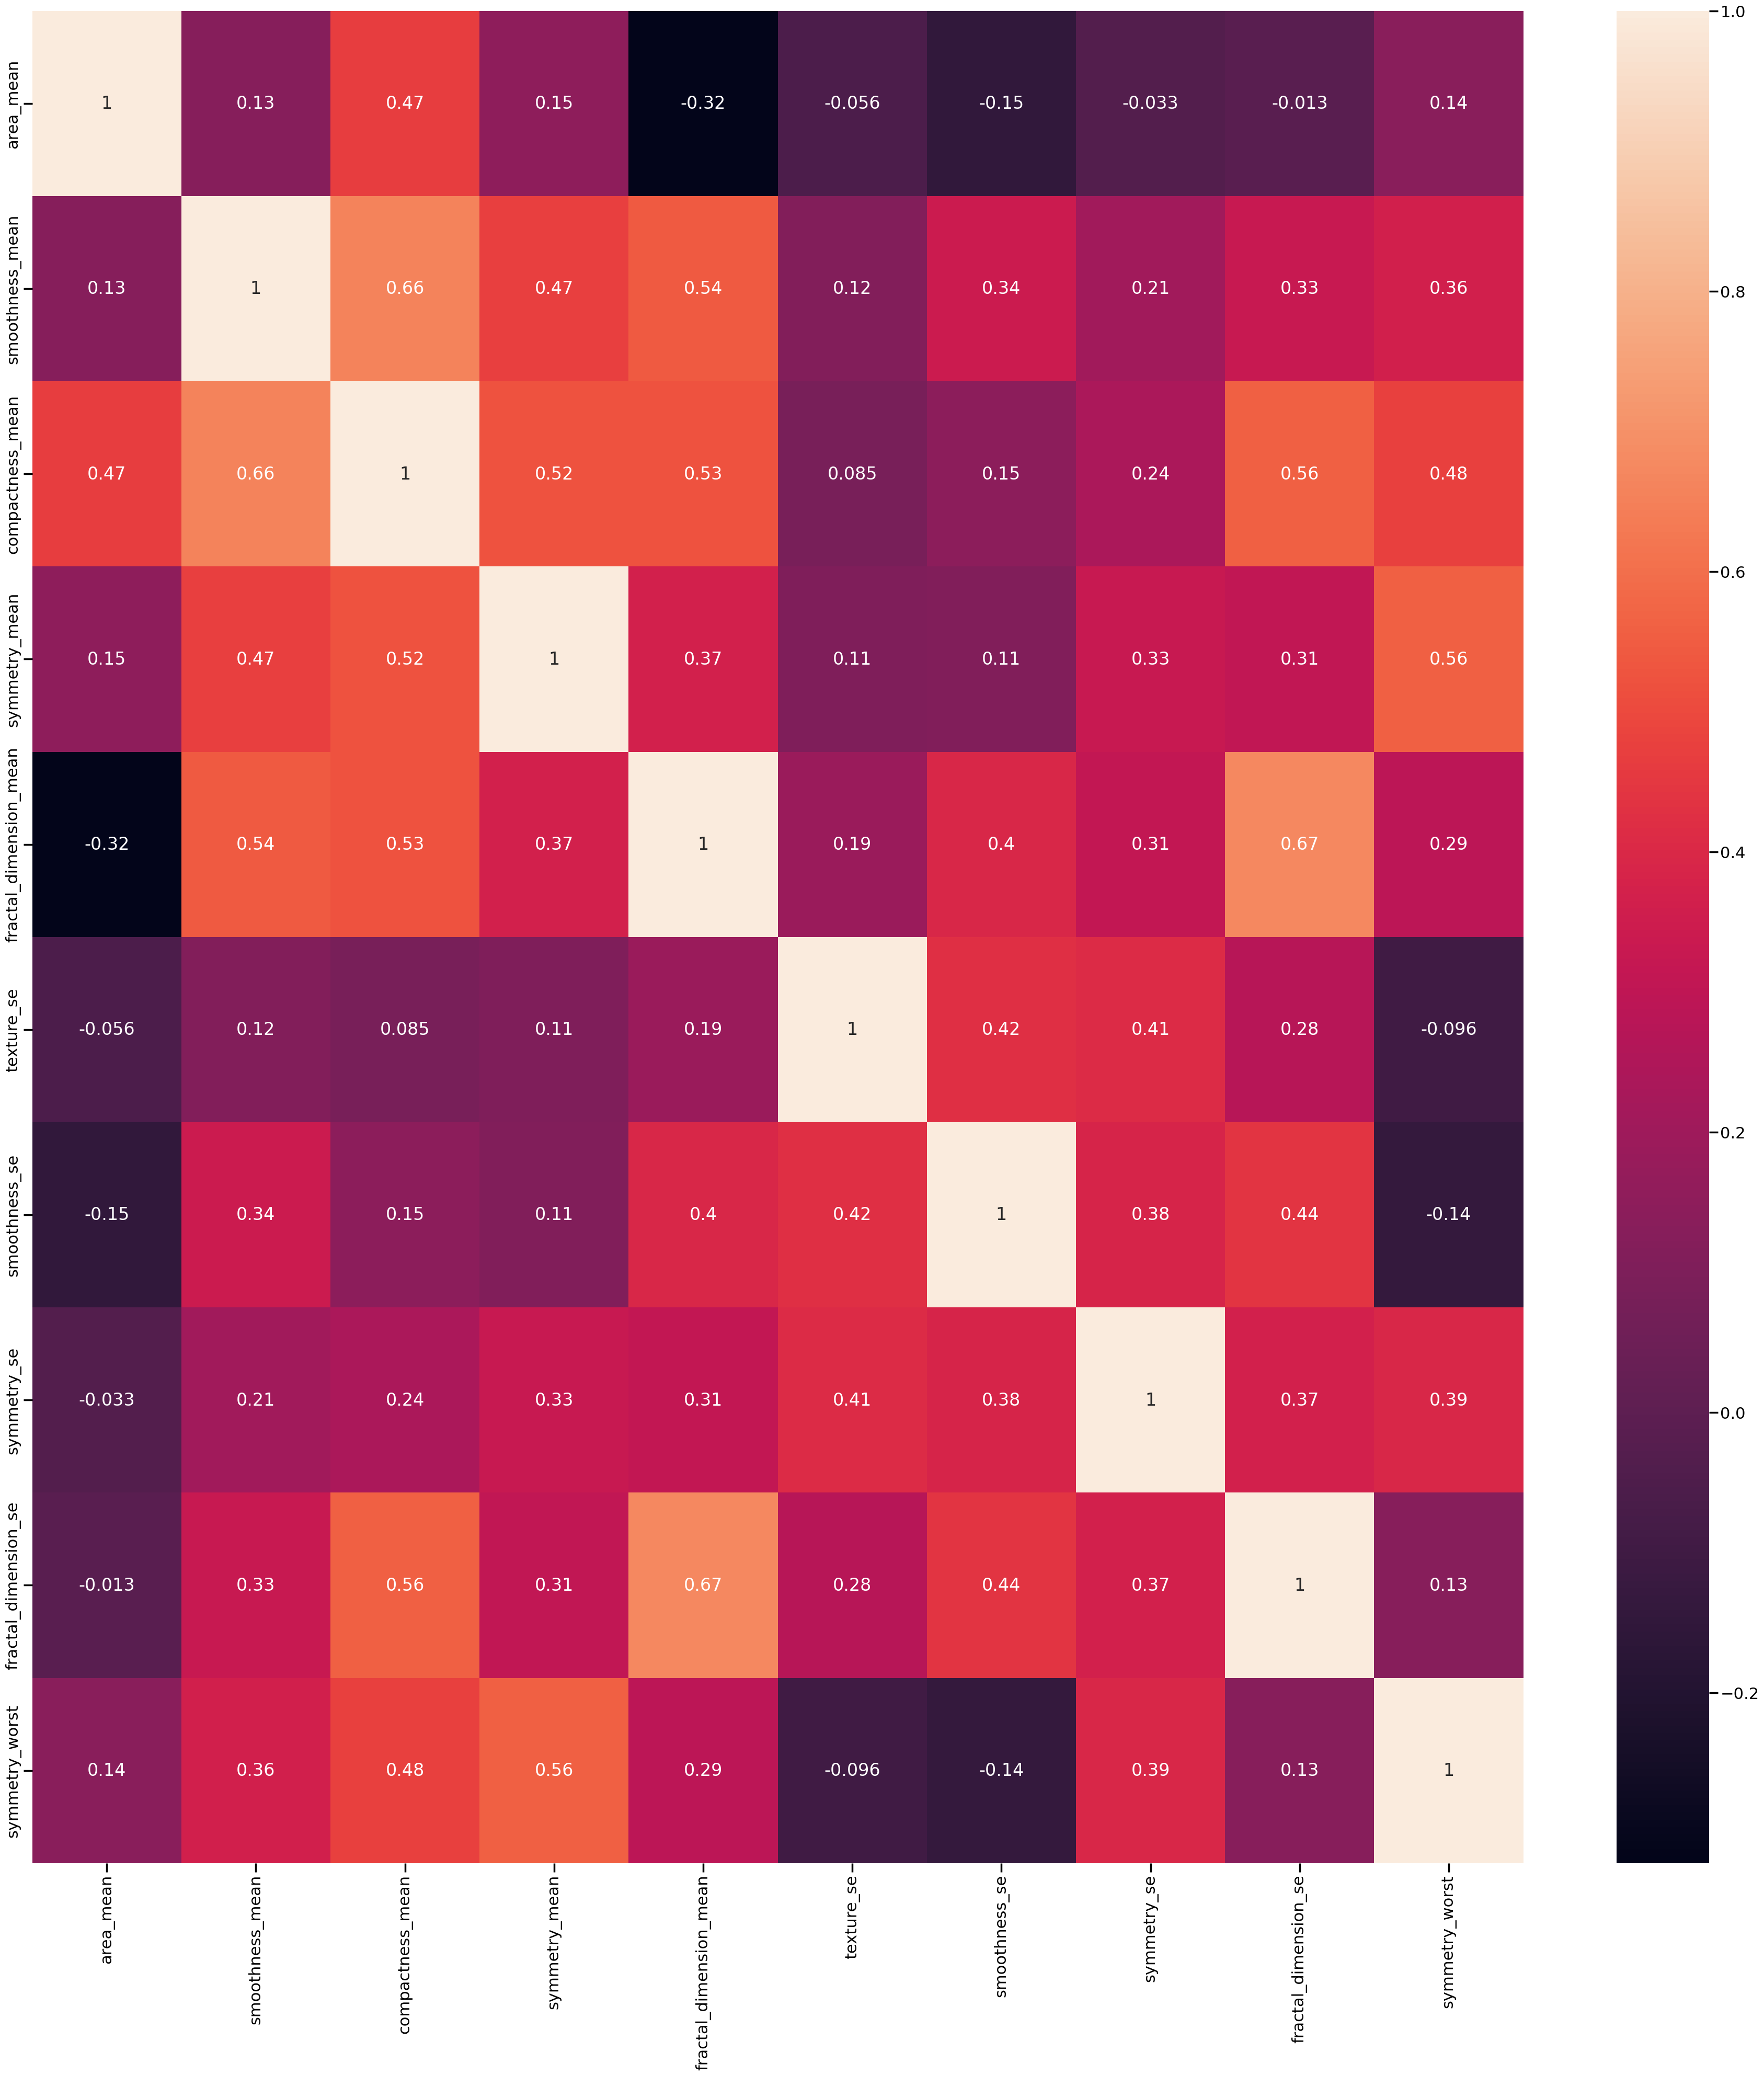

In [41]:
plt.figure(figsize=(46,46))
sns.heatmap(X_train_scaled_df.corr(), annot=True)

In [42]:
variables = ['radius_worst', 
        'texture_worst',  
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se', 
        'radius_mean', 
        'radius_se',
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se',
        'area_se',
        'compactness_se',
        'perimeter_worst']
X_test_scaled_df = X_test_scaled_df.drop(variables, axis=1)

<Axes: >

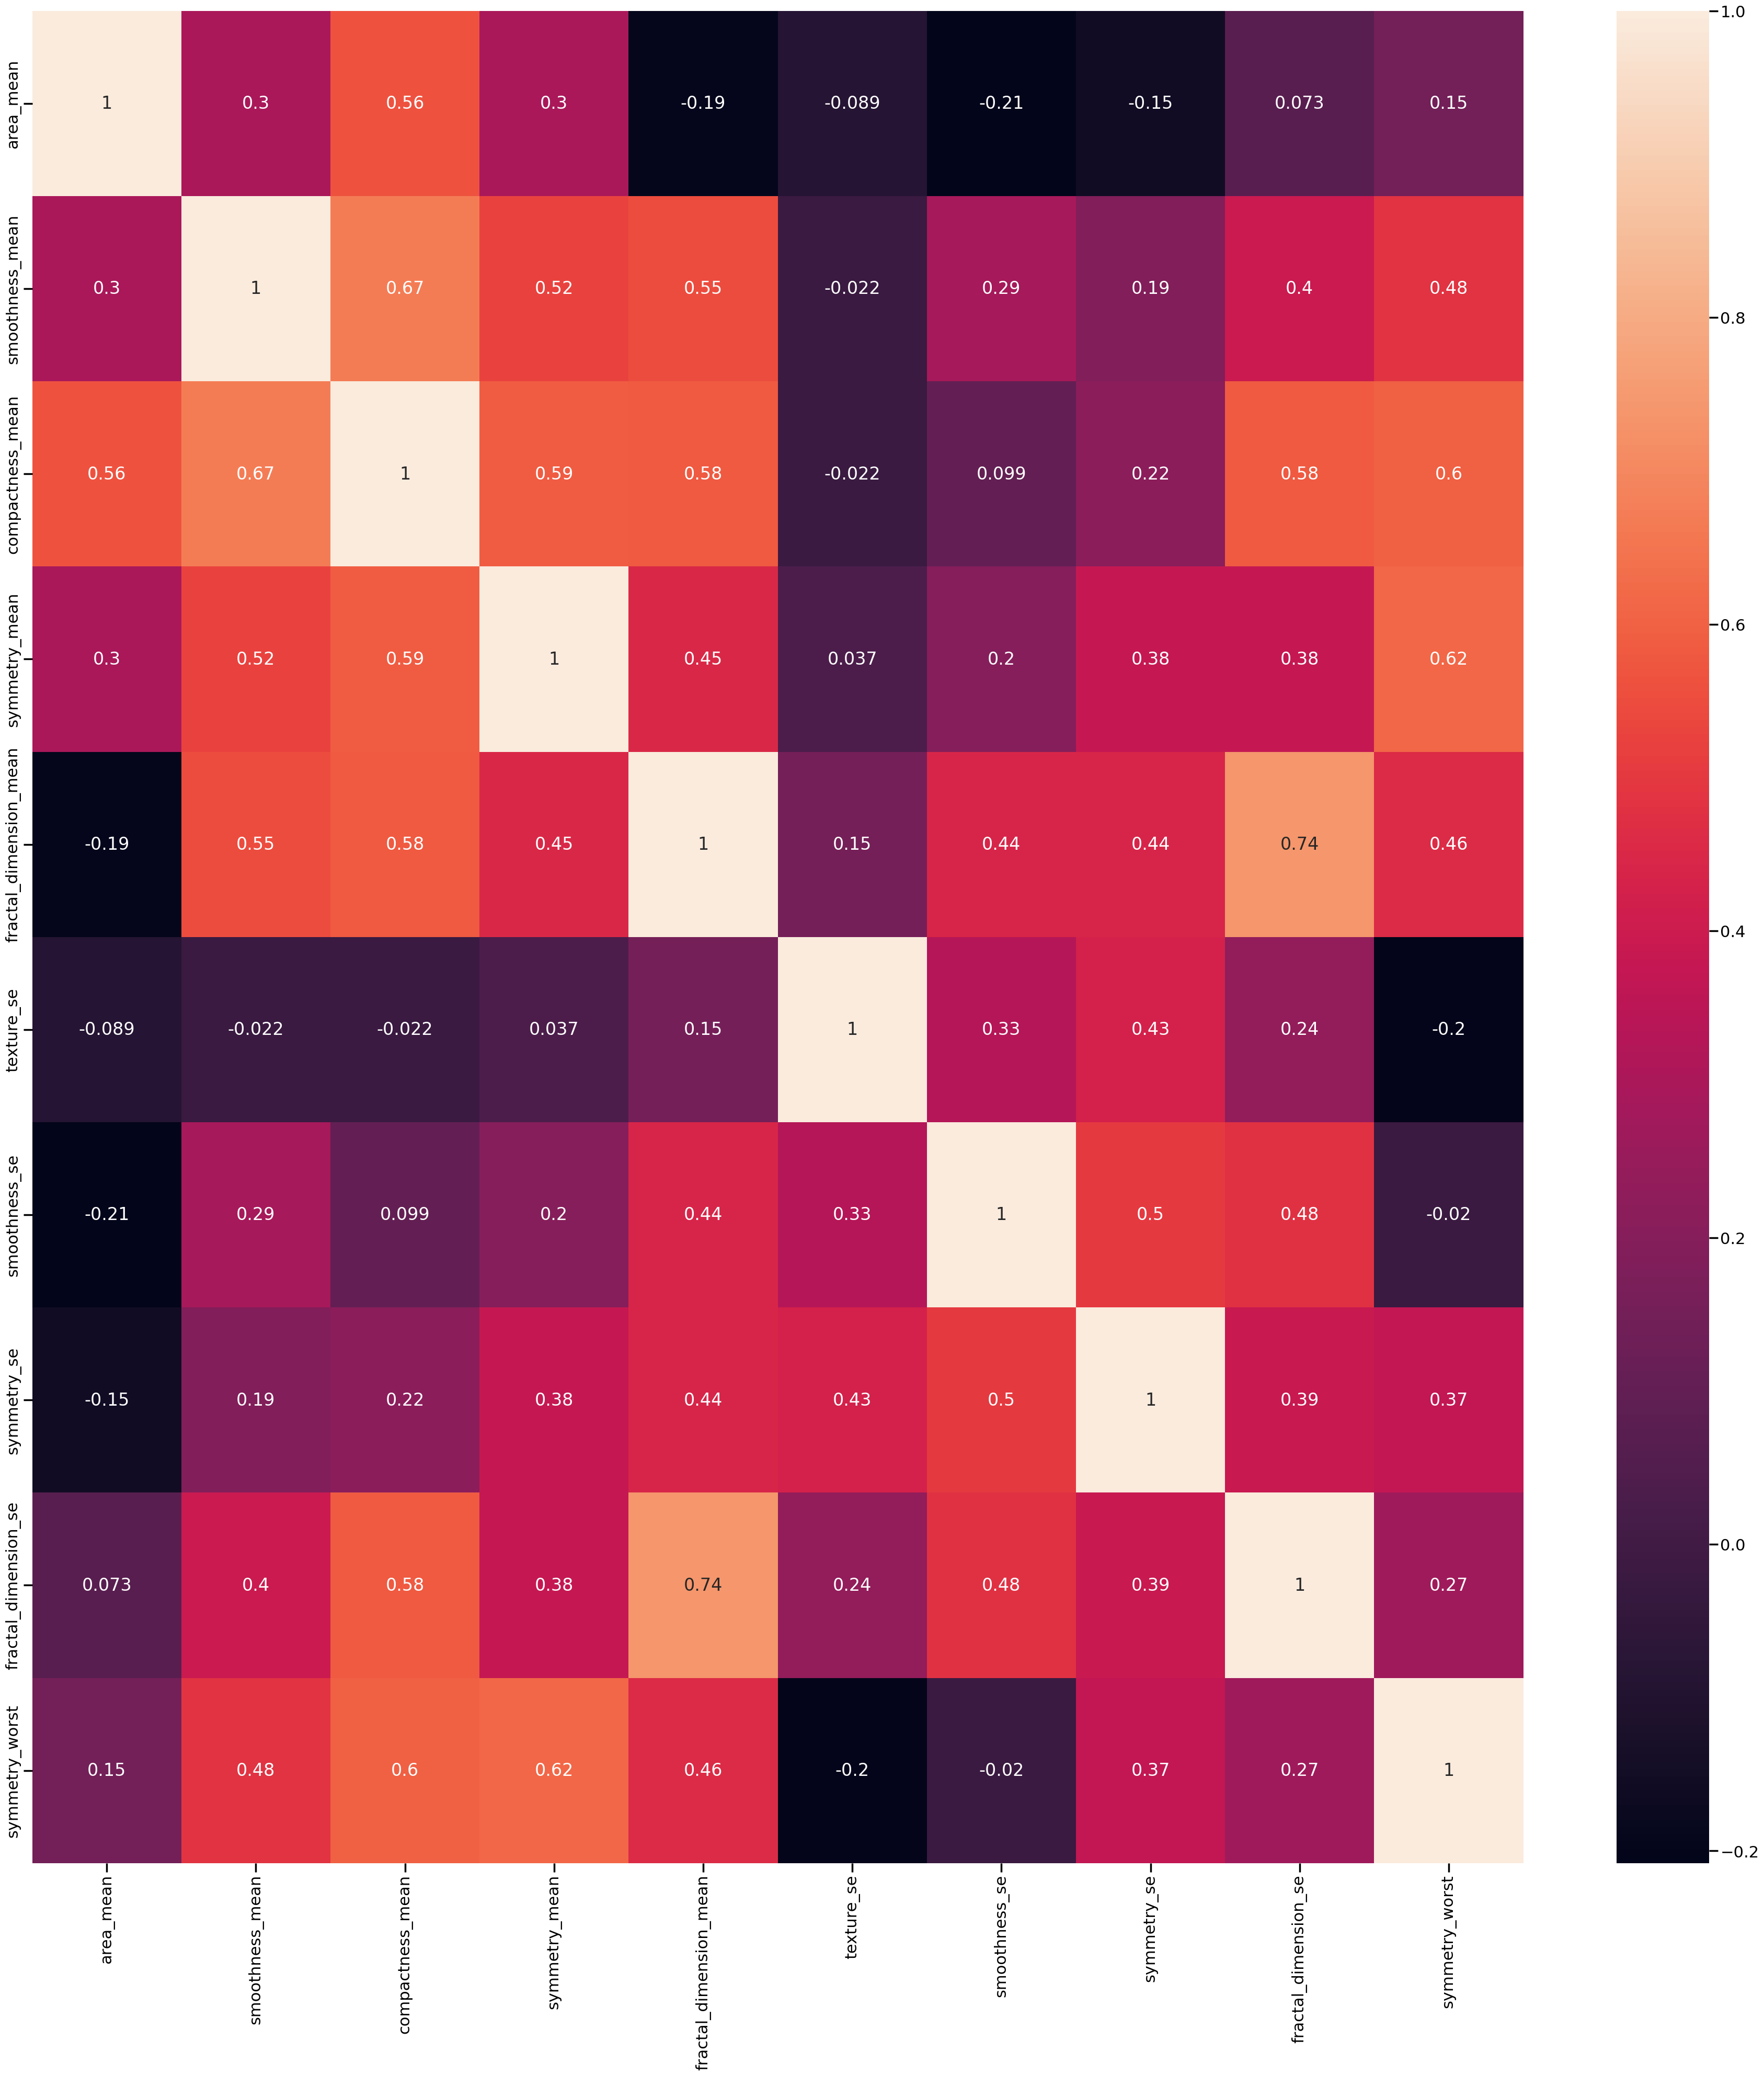

In [43]:
plt.figure(figsize=(46,46))
sns.heatmap(X_test_scaled_df.corr(), annot=True)

<H4> CORRELATION ANALYSIS.</H4>
<b>Multicollinearity occurs when two or more predictors are highly correlated with each other, which can lead to instability in coefficient estimates,  to avoid this,we used the heat-map which Computed the correlation coefficients between all pairs of predictor variables in the dataset, where each cell represents the correlation coefficient between two variables. we then identify Strong Correlations (both positive and negative) between pairs of predictor variables. Typically, correlation coefficients above a certain threshold (e.g., 0.7 or -0.7) are considered strong correlations.</b> 




NB: In a separate analysis, dimensionality reduction was employed to streamline features, yielding improved model evaluation across the board. However, to preserve interpretability, the decision was made to utilize a correlation matrix, thereby facilitating a clear understanding of the relationships between variables

<h3>SUMMARY </h3>
<UL>
 <LI>Conducted descriptive statistical analysis to understand the distribution and variability of features.</LI>
<LI>Utilized various visualizations such as histograms,HEAT MAps to explore relationships between features and diagnose classes.</LI>
<LI>Investigated correlations between features to identify potential multicollinearity and assess feature importance.</LI>
<LI>Addressed missing values using median imputation by class/group and also removal based on the extent of missingness.</LI>
<LI>Standardized numerical features using standard scaler to ensure consistent scaling across all features.</LI>
<LI>Encoded categorical variables using  one-hot encoding</LI>
<LI>Performed feature engineering/ reduction using correlation analysis to derive new features or transform existing ones to capture additional information.</LI>
<LI>Opted against addressing outliers due to a lack of domain expertise, as intervening without a comprehensive understanding of the dataset's intricacies could inadvertently introduce biases or misinterpretations, potentially impacting the validity and reliability of the analysis. although in a separate analysis outliers were handled which gave results not so dissimilar from this analysis</LI></UL>

<H2>UNSUPERVISED MACHINE LEARNING ANALYSIS</H2>
INTRODUCTION

In this analysis, we aim to gain further insights into the dataset through unsupervised machine learning techniques. Leveraging features derived from pre-processing and exploratory data analysis (EDA), we employ clustering algorithms such as K-means, hierarchical clustering, and DBSCAN, alongside dimensionality reduction techniques like PCA. By applying these methods, we seek to identify inherent patterns, groupings, and relationships within the data, facilitating a deeper understanding of its structure and characteristics

In [44]:
num_clusters = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled_df)

# Calculate silhouette score
silhouette_score(X_train_scaled_df, cluster_labels)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.25535282611289684

<h4> Dendogram</h4>

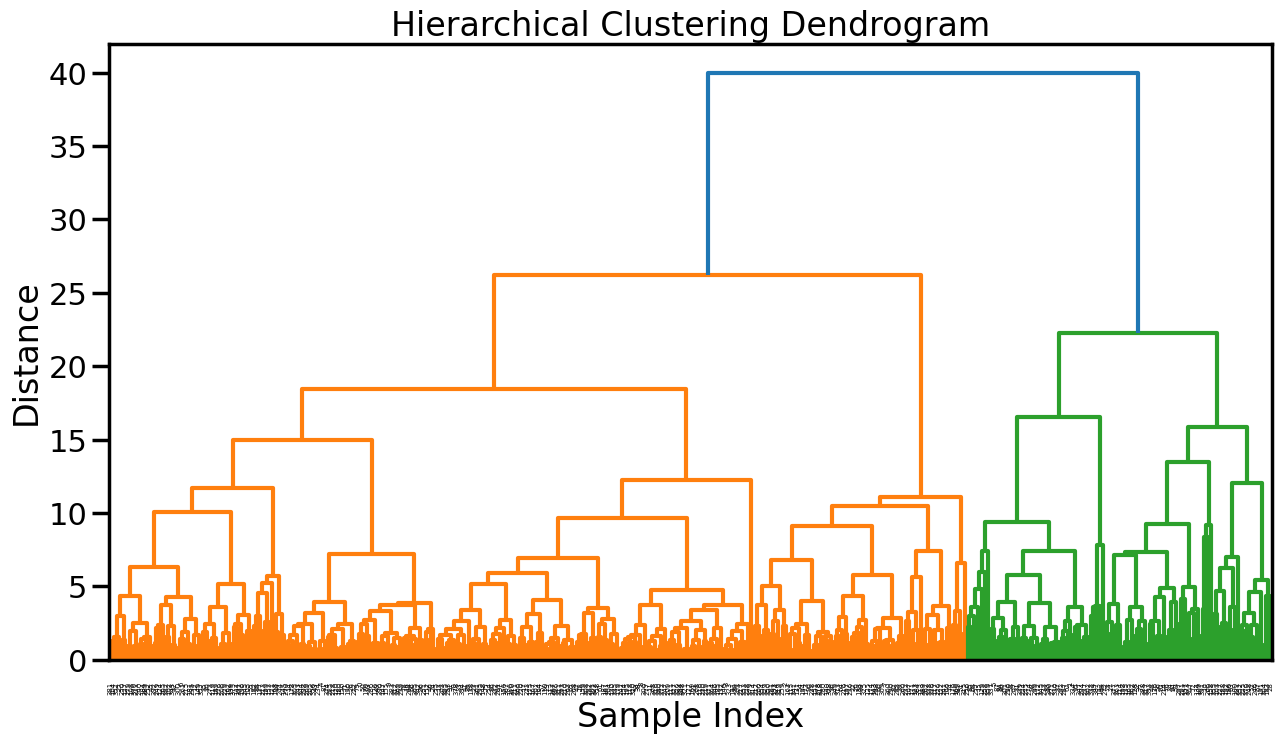

In [45]:
linkage_matrix = linkage(X_train_scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, orientation='top', labels=X_train_scaled_df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

<H4> PRINCIPAL COMPONENT ANALYSIS</H4>

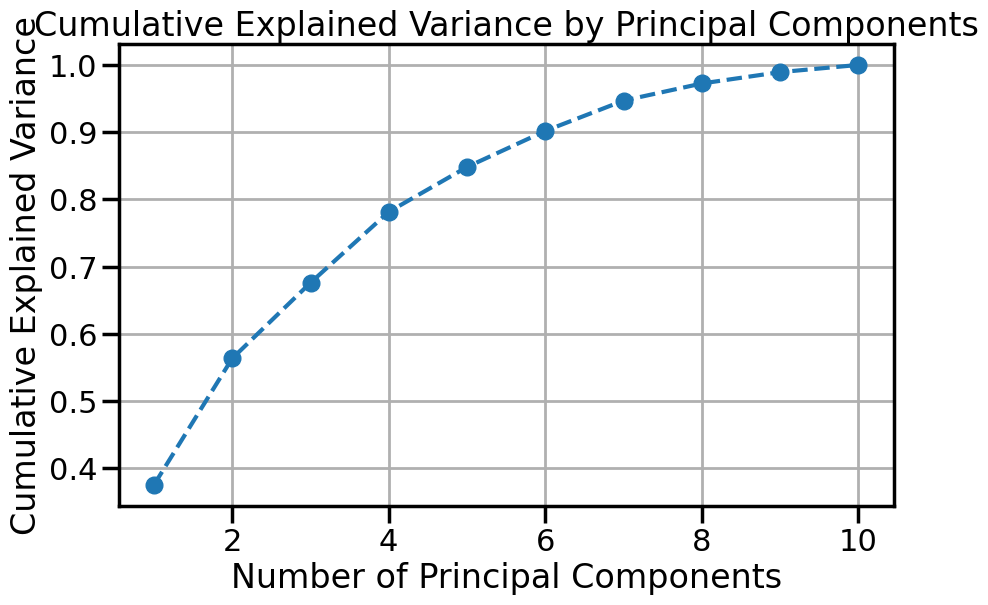

In [46]:
pca = PCA()

# Fit the PCA model
X_pca = pca.fit_transform(X_train_scaled_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [47]:
pca.explained_variance_ratio_

array([0.37549092, 0.18809403, 0.11252276, 0.10541261, 0.06670798,
       0.05364076, 0.04507275, 0.02547366, 0.0168875 , 0.01069703])

from the explained variance ratio it is clear that 7 components succcefully ezplain over 90% of the variance, we will therefore save this as a new data set for further analysis

In [48]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_train_scaled_df)

In [49]:
num_clusters = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Calculate silhouette score
silhouette_score(X_pca, cluster_labels)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.2654924246544464

<H3>SUMMARY</H3>


In summary, our analysis began by determining that two clusters yielded the highest silhouette score of 0.25, indicating optimal clustering. This finding was corroborated by hierarchical clustering, further supporting the choice of two clusters. Subsequently, we explored dimensionality reduction through PCA to potentially enhance clustering performance. While the silhouette score marginally improved to 0.26, suggesting a slight refinement, the overall impact was modest. These results underscore the robustness of the initial clustering approach and highlight the limited influence of dimensionality reduction on clustering efficacy in this context


<H2>CLASSIFICATION</H2>

Introduction:
In this phase of our analysis, we delve into supervised machine learning techniques to tackle the task at hand: classifying cases of breast cancer as benign (Diagnosis=B) or malignant (Diagnosis=M) with an aim to build predictive models that can effectively distinguish between benign and malignant cases.

Our approach encompasses the utilization of diverse classification algorithms for identifying observations as either benign or malignant. Through rigorous evaluation using appropriate metrics, we aim to discern the efficacy and robustness of our supervised models in handling the complexities inherent in the dataset.

In [50]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled_df, y_train)

LogisticRegression(random_state=42)

In [51]:
y_pred = logreg.predict(X_test_scaled_df)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [53]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9529

Confusion Matrix:
[[101   5]
 [  3  61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       106
           1       0.92      0.95      0.94        64

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



In [54]:
svm_classifier = SVC(kernel='poly', C=50, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled_df, y_train)
y_pred = svm_classifier.predict(X_test_scaled_df)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.9235

Confusion Matrix:
[[101   5]
 [  8  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       106
           1       0.92      0.88      0.90        64

    accuracy                           0.92       170
   macro avg       0.92      0.91      0.92       170
weighted avg       0.92      0.92      0.92       170



In [55]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_scaled_df, y_train)

y_pred = clf.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9412
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       106
           1       0.95      0.89      0.92        64

    accuracy                           0.94       170
   macro avg       0.94      0.93      0.94       170
weighted avg       0.94      0.94      0.94       170



<H4> HYPER-PARAMETER TUNING</H4>

In [56]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Values of regularization parameter C
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Values of gamma parameter
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svm_classifier2 = SVC(kernel='rbf', random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the grid search object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=stratified_kfold, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled_df, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Print the best parameters
print(f'Best Parameters: {best_params}')

y_pred = best_svm_model.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)
                      

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9529

Confusion Matrix:
[[102   4]
 [  4  60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       106
           1       0.94      0.94      0.94        64

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



In [57]:
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_df, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print(f'Best Parameters: {best_params}')

# Evaluate the best model on the test set
accuracy = best_rf_model.score(X_test_scaled_df, y_test)
print(f'Accuracy on Test Set: {accuracy}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on Test Set: 0.9294117647058824


Summary:

The classification model achieved an impressive accuracy of 95.29%, indicating its ability to correctly predict the majority of breast cancer cases as benign or malignant. From the confusion matrix, it's evident that the model accurately classified a significant number of cases, with 101 true negatives (benign) and 61 true positives (malignant). However, there were some misclassifications, with 5 false positives and 3 false negatives.

Precision, a measure of the accuracy of positive predictions, was high for both benign (97%) and malignant (92%) classes, indicating that the model had a low rate of false positive predictions. Similarly, recall (sensitivity) was also high for both classes, indicating the model's ability to identify a high proportion of true positives.

The F1-score, which balances precision and recall, was 0.95 for both classes, suggesting a good overall performance of the model in terms of both precision and recall.

Despite evaluating various algorithms such as SVM and Random Forest, logistic regression outperformed them consistently, even after hyperparameter tuning. This underscores the efficacy of logistic regression in this particular classification task, possibly due to its simplicity and interpretability, making it a suitable choice for this application.

Confusion Matrix:

True Negatives (TN): 101 cases were correctly classified as benign.
False Positives (FP): 5 cases were incorrectly classified as malignant.
False Negatives (FN): 3 cases were incorrectly classified as benign.
True Positives (TP): 61 cases were correctly classified as malignant.


<H2>CONCLUSION</H2>

In conclusion, the machine learning project aimed at classifying cases of breast cancer has yielded promising results. Through meticulous preprocessing, exploratory data analysis, and unsupervised learning, valuable insights into the dataset were gained, laying the foundation for the subsequent supervised learning analysis. Leveraging various classification algorithms, including logistic regression, SVM, and Random Forest, logistic regression emerged as the top performer, demonstrating superior accuracy, precision, recall, and F1-score in distinguishing between benign and malignant cases. The model's robust performance, coupled with its interpretability, underscores its potential as a valuable tool in assisting medical professionals in diagnosing breast cancer accurately. Moving forward, continued refinement and validation of the model on larger and diverse datasets could further enhance its reliability and applicability in clinical settings, ultimately contributing to improved patient outcomes and healthcare practices in the domain of breast cancer diagnosis and treatment.

<H2>RECOMMENDATIONS</H2>

In the context of medical diagnostics, such as breast cancer detection, considering the consequences of false positives and false negatives is crucial due to their potential impact on patient outcomes and healthcare resources.

False Positives:

A false positive occurs when the model incorrectly predicts a positive result (e.g., malignant cancer) when the true condition is negative (e.g., benign).
In the case of breast cancer diagnosis, a false positive may lead to unnecessary anxiety and distress for the patient.
False positives can also result in additional diagnostic tests, treatments, or surgeries, which may pose risks and burdens to the patient and healthcare system.
Overdiagnosis and overtreatment resulting from false positives can strain healthcare resources and increase healthcare costs.
False Negatives:

A false negative occurs when the model incorrectly predicts a negative result (e.g., benign cancer) when the true condition is positive (e.g., malignant).
In the context of breast cancer diagnosis, a false negative may lead to delayed or missed treatment for patients with malignant tumors.
Delayed diagnosis or treatment can negatively impact patient outcomes, potentially leading to disease progression, metastasis, or poorer prognosis.
False negatives may erode patient trust in the healthcare system and the reliability of diagnostic tests.
Considering these factors, the balance between false positives and false negatives is crucial. The trade-off between sensitivity recall and precision must be carefully evaluated to minimize the occurrence of false positives and false negatives while optimizing overall diagnostic accuracy. 

Additionally, the specific preferences and priorities of patients and healthcare providers should be taken into account when interpreting and applying the model's predictions in clinical practice.
For patients, this could involve taking into account their personal values, preferences, and priorities when discussing treatment options or diagnostic results. Each patient may have unique considerations, such as their tolerance for risk, desire for aggressive treatment, or preferences regarding quality of life. Therefore, healthcare decisions should be tailored to align with their individual needs and preferences.

Similarly, healthcare providers play a crucial role in interpreting and applying the model's predictions within the clinical context. They must consider factors such as their clinical expertise, professional judgment, and the specific circumstances of each patient when making decisions based on the model's output. Additionally, they should be aware of any limitations or uncertainties associated with the model and use it as a tool to complement their clinical judgment rather than replace it entirely.

Overall, this statement underscores the importance of a patient-centered approach to healthcare decision-making, where the model's predictions are considered alongside other relevant factors, including patient preferences and clinical expertise, to ensure that the care provided is both effective and aligned with the needs and values of the individual patient.

<H2>Ethical Considerations in Machine Learning</H2>

Machine learning projects, particularly in sensitive domains like healthcare and finance, demand careful consideration of ethical implications. One critical concern is the potential for bias and unfair outcomes. Machine learning models trained on biased data may perpetuate inequalities, leading to unjust treatment for certain demographic groups. Addressing and mitigating biases is paramount to ensure fairness and equity in decision-making processes.

Moreover, privacy and data protection are significant ethical considerations in machine learning. The reliance on large datasets raises concerns about the security and confidentiality of sensitive personal information. Robust data protection measures, along with obtaining informed consent from individuals, are essential safeguards to protect privacy rights and uphold ethical standards. Additionally, the impact on employment is a pertinent ethical issue. Automation driven by machine learning technologies can disrupt labor markets, potentially leading to job displacement and economic inequalities. It's imperative to anticipate and address these impacts by implementing strategies for reskilling and upskilling workers, thus mitigating adverse effects on employment and fostering a more inclusive society.

<H3>REFERENCES</H3>

1.Barnett, A. G., van der Pols, J. C., & Dobson, A. J. (2019). A hands-on tutorial for comparing means using R. BMC Medical       Research Methodology, 19(1), 79. https://doi.org/10.1186/s12874-019-0681-4.

2 Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to       Build Intelligent Systems. O'Reilly Media.

3 Prakash, A. (2019, December 20). Data preprocessing concepts. Towards Data Science. https://towardsdatascience.com/data-       preprocessing-concepts-fa946d11c825.